# Part One: The National Childhood Development Study

Below is a demonstration of the intended analysis for Chapter One of my PhD. THis analysis uses the NCDS dataset using sweeps 16 and 23 (1974-1981). The following analysis focuses upon Youth Transition after mandatory education. This analysis attempts to understand the decisions, choices, and constraints that individuals face when negotiating entry into economic activity post-mandatory schooling for the first time. As such, the outcome variable of interest is a post-hoc economic activity entry from sweep 23 for the month of September when individuals were aged 16 years old. The independent variables of interest are: Sex, Housing Tenure when a child, Father's Social Class when a child, Educational Attainment at 16 (Number of O-level Passes), Reading and Maths scores at age 11. 

The analysis below is made up of several important steps. Firstly the data is cleaned and recoded in a way that the data will be used all throughout the rest of the analysis. Secondly, descriptive statistics will be produced to best understand the data. Third, model construction and sensitivity analysis of social class measures. Finally, there will be an attempt to handle missing data within the model. 

## Part One: Data Cleaning and Re-coding

In [1]:
import stata_setup

stata_setup.config("C:\Program Files\Stata18", "se")


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      18.0
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2023 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user network, expiring 14 Sep 2024
Serial number: 401809305318
  Licensed to: Scott Oatley
               University of Edinburgh

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000 but can be increased;
          see help set_maxvar.


The import command tells Jupyter Notebook to import stata from its given location in my internal system and call it up for use in the virutal notebook. 

In [2]:
%%stata

cd "G:\Stata data and do\NCDS\Occupation Codes\UKDA-7023-stata9\stata9"
use "G:\Stata data and do\NCDS\Occupation Codes\UKDA-7023-stata9\stata9\ncds2_occupation_coding_father"


cd "G:\Stata data and do\NCDS\NCDS Sweep 16\stata\stata11"


. 
. cd "G:\Stata data and do\NCDS\Occupation Codes\UKDA-7023-stata9\stata9"
G:\Stata data and do\NCDS\Occupation Codes\UKDA-7023-stata9\stata9

. use "G:\Stata data and do\NCDS\Occupation Codes\UKDA-7023-stata9\stata9\ncds2
> _occupation_coding_father"

. 
. 
. cd "G:\Stata data and do\NCDS\NCDS Sweep 16\stata\stata11"
G:\Stata data and do\NCDS\NCDS Sweep 16\stata\stata11

. 


This is setting my cd initially to the file within my local drive that hosts the occupational codes (NS-SEC, RGSC, and CAMSIS). It then loads this occupational codes dataset into stata and then with the same cd command resets the location to the location of the sweep 16 dataset. 

In [3]:
%%stata

rename NCDSID ncdsid
  
merge 1:1 ncdsid using ncds0123
drop _merge


. 
. rename NCDSID ncdsid

.   
. merge 1:1 ncdsid using ncds0123

    Result                      Number of obs
    -----------------------------------------
    Not matched                         3,221
        from master                         0  (_merge==1)
        from using                      3,221  (_merge==2)

    Matched                            15,337  (_merge==3)
    -----------------------------------------

. drop _merge

. 


Using longitudinal data such as the NCDS, every individual participant is given a unique personal identifier. When using datasets from multiple points in time this allows for them to be merged and successfully link data across time to the same person. The unique id in the occupational codes dataset is capitalised however. Before merging the datasets the ''NCDSID'' has to be renamed to ''ncdsid''. After this the occupational codes dataset is now merged with the sweep 16 dataset. After this merge has been completed the generated variable merge is dropped. 

In [4]:
%%stata

cd "G:\Stata data and do\NCDS\NCDS Sweep 23\stata\stata9"

merge 1:1 ncdsid using ncds4
drop _merge


. 
. cd "G:\Stata data and do\NCDS\NCDS Sweep 23\stata\stata9"
G:\Stata data and do\NCDS\NCDS Sweep 23\stata\stata9

. 
. merge 1:1 ncdsid using ncds4

    Result                      Number of obs
    -----------------------------------------
    Not matched                         6,021
        from master                     6,021  (_merge==1)
        from using                          0  (_merge==2)

    Matched                            12,537  (_merge==3)
    -----------------------------------------

. drop _merge

. 


Using the cd command, the root directory is now set at the location that hosts the sweep 23 dataset. This dataset is also merged with the occupational codes and sweep 16 dataset allowing for all data to be in one central location. Merge is also dropped after a successful merge. 

In [5]:
%%stata

cd "G:\Stata data and do\Tables and Figures\Tables and Figuers for Chapter One"

codebook ec201 n4655 n4656 n622_4 n2017 n1152 N2SNSSEC N2SCMSIS N2SRGSC, compact


. 
. cd "G:\Stata data and do\Tables and Figures\Tables and Figuers for Chapter On
> e"
G:\Stata data and do\Tables and Figures\Tables and Figuers for Chapter One

. 
. codebook ec201 n4655 n4656 n622_4 n2017 n1152 N2SNSSEC N2SCMSIS N2SRGSC, comp
> act

Variable     Obs Unique      Mean  Min   Max  Label
-------------------------------------------------------------------------------
ec201      12536     28  288.9482   -1   800  4D Economic Activity in Month 201
n4655      12535      3  1.401436    1     9  4I Whether 'o' levels passed
n4656       7630      9  4.974705    1     9  4I Number of 'o' levels passed
n622_4     12536      2   1.50016    1     2  Sex of Cohort Member
n2017      14653      7  .6339316   -1     6  3M Identify child's ethnic gro...
n1152      15335      7  1.498468   -1     6  2P Tenure of accomodation
N2SNSSEC   11156     30  9.735667    2  13.5  NCDS 1969 Father: NS-SEC socia...
N2SCMSIS   11158     66  4.420927  1.8   9.4  NCDS 1969 Father: CAMSIS code ...
N2

Following a successful merge of all required datasets, all intended to use variables are gathered in a compact codebook to assess the needs to potentiall recode and clean the data. Some issues are readily apparent. For example many of the variables have negative values in the minimum values, suggesting either missing or N/A data that will need to be recoded. There are also different levels of observations for each varaible in question, suggesting that missingness may pose a problem for future model creation. 

In [6]:
%%stata

tab ec201

collect export "raw.docx", replace


. 
. tab ec201

     4D Economic |
     Activity in |
       Month 201 |      Freq.     Percent        Cum.
-----------------+-----------------------------------
         MISSING |         86        0.69        0.69
          FT JOB |      4,716       37.62       38.31
    FT JOB+PT ED |        144        1.15       39.45
      FT JOB+APP |      1,842       14.69       54.15
   FTJ+APP+PT ED |         22        0.18       54.32
  FTJ+APP+DBR TC |         21        0.17       54.49
      FTJ+OTH TC |          1        0.01       54.50
         FTJ+DBR |        366        2.92       57.42
 FTJ+DBR TC+PTED |          4        0.03       57.45
         FTJ+OTH |         20        0.16       57.61
 FTJ+OTH TC+PTED |          1        0.01       57.62
FTJ+FT NT TOPSTC |         35        0.28       57.90
   FTJ+FTTC+PTED |          1        0.01       57.91
        FTJ+LGSS |          2        0.02       57.92
 FTJ+LGSS+DBR TC |          1        0.01       57.93
          PT JOB |         

Due to this variable being the desired outcome variable, it is of interest to add its raw form as a table within my PhD thesis. Especially given how many categories it includes. Not all of these acronyms can be deciphered even with the relevant codebooks and documents attached to the dataset - this is something that will need to be noted within the thesis itself, even if these incidents only make up a handful of observations. Given the categories available as well as the previous literature, this outcome variable would be best collapsed into five distinct categories: Employment, Post-Schooling Education, School, Training & Apprenticeships, and Unemployment & Out of the Labour Force. Ideally the last category would be split up into two distinct categories as qualitatively there is a difference between being unemployed and being out of the labour force, however the very low levels of observations for each would impact the overall statistical power of the model so it is best that they are combined. 

In [7]:
%%stata

gen econ201=.
replace econ201=. if (ec201==.)
replace econ201=. if (ec201==-1)
replace econ201=1 if (ec201==100)
replace econ201=1 if (ec201==101)
replace econ201=1 if (ec201==200)
replace econ201=1 if (ec201==201)

replace econ201=2 if (ec201==500)
replace econ201=2 if (ec201==800)

replace econ201=3 if (ec201==550)

replace econ201=4 if (ec201==110)
replace econ201=4 if (ec201==111)
replace econ201=4 if (ec201==113)
replace econ201=4 if (ec201==114)
replace econ201=4 if (ec201==120)
replace econ201=4 if (ec201==121)
replace econ201=4 if (ec201==130)
replace econ201=4 if (ec201==131)
replace econ201=4 if (ec201==140)
replace econ201=4 if (ec201==141)
replace econ201=4 if (ec201==150)
replace econ201=4 if (ec201==152)
replace econ201=4 if (ec201==220)
replace econ201=4 if (ec201==300)
replace econ201=4 if (ec201==400)

replace econ201=5 if (ec201==600)
replace econ201=5 if (ec201==601)
replace econ201=5 if (ec201==602)
replace econ201=5 if (ec201==700)
replace econ201=5 if (ec201==701)

label define econ_lbl 1"Employment" 2"Post-Schooling Education" 3"School" 4"Training/Apprenticeships" 5"Unemployment and OLF"
label value econ201 econ_lbl

tab econ201


. 
. gen econ201=.
(18,558 missing values generated)

. replace econ201=. if (ec201==.)
(0 real changes made)

. replace econ201=. if (ec201==-1)
(0 real changes made)

. replace econ201=1 if (ec201==100)
(4,716 real changes made)

. replace econ201=1 if (ec201==101)
(144 real changes made)

. replace econ201=1 if (ec201==200)
(37 real changes made)

. replace econ201=1 if (ec201==201)
(2 real changes made)

. 
. replace econ201=2 if (ec201==500)
(1,046 real changes made)

. replace econ201=2 if (ec201==800)
(11 real changes made)

. 
. replace econ201=3 if (ec201==550)
(3,717 real changes made)

. 
. replace econ201=4 if (ec201==110)
(1,842 real changes made)

. replace econ201=4 if (ec201==111)
(22 real changes made)

. replace econ201=4 if (ec201==113)
(21 real changes made)

. replace econ201=4 if (ec201==114)
(1 real change made)

. replace econ201=4 if (ec201==120)
(366 real changes made)

. replace econ201=4 if (ec201==121)
(4 real changes made)

. replace econ201=4 if (ec201==

The resulting recoding provides the five categories. The outcome varaible was recoded to ''econ201'' as September 1974 (when individuals were 16) is the 201st month since birth for these indviduals. A table is also produced to show the descriptive statistics of the outcome variable. As can be seen 40% of people are in Employment, 30% in School, 19% in some form of Training & Apprenticeship, and the other are either in Post-Schooling Education or Unemployed & OLF. 

Moving on to the independent variables, the desired variable of educational attainment required combining two seperate variables within the dataset. One is a count variable of how many o-levels an indiviudal passed at school, though this variable does not include zero counts. Fortunately, our second varaible does. This varaible could have been left as a count variable however the sample sizes are too low or have zero responses for too many categories. This will be demonstrated by first constructing a count variable, then producing a table of O-level passes by economic activity, then finally producing a dummy variable of <5 O-level passes or five or more O-level passes. 

In [8]:
%%stata

gen olevel=.
replace olevel=0 if (n4655==2)
replace olevel=1 if (n4656==1)
replace olevel=2 if (n4656==2)
replace olevel=3 if (n4656==3)
replace olevel=4 if (n4656==4)
replace olevel=5 if (n4656==5)
replace olevel=6 if (n4656==6)
replace olevel=7 if (n4656==7)
replace olevel=8 if (n4656==8)
replace olevel=9 if (n4656==9)

label define olevel_lbl 0"0" 1"1" 2"2" 3"3" 4"4" 5"5" 6"6" 7"7" 8"8" 9"9 or More"
label value olevel olevel_lbl

table ( econ201 ) ( olevel ) (), statistic(sumw) 

collect export "counttable.docx", replace

gen obin=.
replace obin=0 if (olevel==0)
replace obin=0 if (olevel==1)
replace obin=0 if (olevel==2)
replace obin=0 if (olevel==3)
replace obin=0 if (olevel==4)
replace obin=1 if (olevel==5)
replace obin=1 if (olevel==6)
replace obin=1 if (olevel==7)
replace obin=1 if (olevel==8)
replace obin=1 if (olevel==9)

label define obin_lbl 0"<5 O-Levels" 1">5 O-Levels"
label value obin obin_lbl

tab obin


. 
. gen olevel=.
(18,558 missing values generated)

. replace olevel=0 if (n4655==2)
(4,880 real changes made)

. replace olevel=1 if (n4656==1)
(1,224 real changes made)

. replace olevel=2 if (n4656==2)
(823 real changes made)

. replace olevel=3 if (n4656==3)
(670 real changes made)

. replace olevel=4 if (n4656==4)
(680 real changes made)

. replace olevel=5 if (n4656==5)
(830 real changes made)

. replace olevel=6 if (n4656==6)
(719 real changes made)

. replace olevel=7 if (n4656==7)
(772 real changes made)

. replace olevel=8 if (n4656==8)
(719 real changes made)

. replace olevel=9 if (n4656==9)
(1,193 real changes made)

. 
. label define olevel_lbl 0"0" 1"1" 2"2" 3"3" 4"4" 5"5" 6"6" 7"7" 8"8" 9"9 or M
> ore"

. label value olevel olevel_lbl

. 
. table ( econ201 ) ( olevel ) (), statistic(sumw) 

----------------------------------------------------------------------------------------------------------
                           |                                     olevel  

Next is the Sex variable. The intention is to use Female as the base reference category. 

In [9]:
%%stata

gen sex=. 
replace sex=0 if (n622_4==2)
replace sex=1 if (n622_4==1)

label define sex_lbl 0"Female" 1"Male"
label value sex sex_lbl

tab sex


. 
. gen sex=. 
(18,558 missing values generated)

. replace sex=0 if (n622_4==2)
(6,270 real changes made)

. replace sex=1 if (n622_4==1)
(6,266 real changes made)

. 
. label define sex_lbl 0"Female" 1"Male"

. label value sex sex_lbl

. 
. tab sex

        sex |      Freq.     Percent        Cum.
------------+-----------------------------------
     Female |      6,270       50.02       50.02
       Male |      6,266       49.98      100.00
------------+-----------------------------------
      Total |     12,536      100.00

. 


Next is the Race variable. The intention is to use White as the base reference category. 

In [10]:
%%stata

gen race=.
replace race=0 if (n2017==1)
replace race=1 if (n2017==2)
replace race=1 if (n2017==3)
replace race=1 if (n2017==4)
replace race=1 if (n2017==5)
replace race=1 if (n2017==6)

label define race_lbl 0"White" 1"Non-White"
label value race race_lbl

tab race 


. 
. gen race=.
(18,558 missing values generated)

. replace race=0 if (n2017==1)
(10,953 real changes made)

. replace race=1 if (n2017==2)
(163 real changes made)

. replace race=1 if (n2017==3)
(156 real changes made)

. replace race=1 if (n2017==4)
(24 real changes made)

. replace race=1 if (n2017==5)
(51 real changes made)

. replace race=1 if (n2017==6)
(71 real changes made)

. 
. label define race_lbl 0"White" 1"Non-White"

. label value race race_lbl

. 
. tab race 

       race |      Freq.     Percent        Cum.
------------+-----------------------------------
      White |     10,953       95.93       95.93
  Non-White |        465        4.07      100.00
------------+-----------------------------------
      Total |     11,418      100.00

. 


Unfortunately the Race variable is non-viable for inclusion within the model. The Non-white population is only 4%, having that spread out across five outcomes would impact the overall statistical power of the model. Not to mention having a dummy for race would assume a level of homogenity across non-white racial groups that in reality does not exist. Therefore, race is dropped from the model. 

Next up is Housing Tenure. The intention is to have people owning their own home as the base reference category. 

In [11]:
%%stata

gen tenure=. 
replace tenure=0 if (n1152==1)
replace tenure=1 if (n1152==2)
replace tenure=1 if (n1152==3)
replace tenure=1 if (n1152==4)
replace tenure=1 if (n1152==5)
replace tenure=1 if (n1152==6)

label define tenure_lbl 0"Own Home" 1"Don't Own Home"
label value tenure tenure_lbl

tab tenure


. 
. gen tenure=. 
(18,558 missing values generated)

. replace tenure=0 if (n1152==1)
(6,319 real changes made)

. replace tenure=1 if (n1152==2)
(5,756 real changes made)

. replace tenure=1 if (n1152==3)
(937 real changes made)

. replace tenure=1 if (n1152==4)
(100 real changes made)

. replace tenure=1 if (n1152==5)
(649 real changes made)

. replace tenure=1 if (n1152==6)
(38 real changes made)

. 
. label define tenure_lbl 0"Own Home" 1"Don't Own Home"

. label value tenure tenure_lbl

. 
. tab tenure

        tenure |      Freq.     Percent        Cum.
---------------+-----------------------------------
      Own Home |      6,319       45.79       45.79
Don't Own Home |      7,480       54.21      100.00
---------------+-----------------------------------
         Total |     13,799      100.00

. 


Next up are the social class measures. For the proposed sensitivity analysis, the intention is to have three distinct models, each one using a different social class measure. One model will have NS-SEC, another RGSC, and the final one will have CAMSIS. For the categorical NS-SEC and RGSC the I category will act as the base reference, CAMSIS will be treated as metric and thus does not have a base reference category. 

In [12]:
%%stata

gen nssec=. 
replace nssec=1 if (N2SNSSEC==2)

replace nssec=2 if (N2SNSSEC==3.1)
replace nssec=2 if (N2SNSSEC==3.2)
replace nssec=2 if (N2SNSSEC==3.3)

replace nssec=3 if (N2SNSSEC==4.1)
replace nssec=3 if (N2SNSSEC==4.2)
replace nssec=3 if (N2SNSSEC==4.3)
replace nssec=3 if (N2SNSSEC==5)

replace nssec=4 if (N2SNSSEC==7.1)
replace nssec=4 if (N2SNSSEC==7.2)
replace nssec=4 if (N2SNSSEC==7.3)
replace nssec=4 if (N2SNSSEC==7.4)

replace nssec=5 if (N2SNSSEC==8.1)
replace nssec=5 if (N2SNSSEC==9.1)
replace nssec=5 if (N2SNSSEC==9.2)

replace nssec=6 if (N2SNSSEC==10)
replace nssec=6 if (N2SNSSEC==11.1)
replace nssec=6 if (N2SNSSEC==11.2)

replace nssec=7 if (N2SNSSEC==12.1)
replace nssec=7 if (N2SNSSEC==12.2)
replace nssec=7 if (N2SNSSEC==12.3)
replace nssec=7 if (N2SNSSEC==12.4)
replace nssec=7 if (N2SNSSEC==12.5)
replace nssec=7 if (N2SNSSEC==12.6)
replace nssec=7 if (N2SNSSEC==12.7)

replace nssec=8 if (N2SNSSEC==13.1)
replace nssec=8 if (N2SNSSEC==13.2)
replace nssec=8 if (N2SNSSEC==13.3)
replace nssec=8 if (N2SNSSEC==13.4)
replace nssec=8 if (N2SNSSEC==13.5)

label define nssec_lbl 1"Large Employers and higher managerial occupations" 2"Higher professional occupations" 3"Lower Managerial and professional occupations" 4"Intermediate occupations" 5"Small employers and own account workers" 6"Lower supervisory and technical occupations" 7"Semi-routine occupations" 8"Routine occupations"
label value nssec nssec_lbl

gen camsisf=.
replace camsisf=85.6 if N2SSOC90==100
replace camsisf=71.5 if N2SSOC90==101
replace camsisf=70.7 if N2SSOC90==102
replace camsisf=69.3 if N2SSOC90==103
replace camsisf=59.5 if N2SSOC90==110
replace camsisf=58.2 if N2SSOC90==111
replace camsisf=55.4 if N2SSOC90==112
replace camsisf=66.2 if N2SSOC90==113
replace camsisf=76.4 if N2SSOC90==120
replace camsisf=65.9 if N2SSOC90==121
replace camsisf=61.5 if N2SSOC90==122
replace camsisf=71 if N2SSOC90==123
replace camsisf=70.4 if N2SSOC90==124
replace camsisf=70.4 if N2SSOC90==125
replace camsisf=69.9 if N2SSOC90==126
replace camsisf=70 if N2SSOC90==127
replace camsisf=58.5 if N2SSOC90==130
replace camsisf=65.1 if N2SSOC90==131
replace camsisf=64.1 if N2SSOC90==132
replace camsisf=63.7 if N2SSOC90==139
replace camsisf=57.5 if N2SSOC90==140
replace camsisf=50.3 if N2SSOC90==141
replace camsisf=48.3 if N2SSOC90==142
replace camsisf=77 if N2SSOC90==150
replace camsisf=68.6 if N2SSOC90==151
replace camsisf=60 if N2SSOC90==152
replace camsisf=68.6 if N2SSOC90==153
replace camsisf=68.6 if N2SSOC90==154
replace camsisf=68.6 if N2SSOC90==155
replace camsisf=55.4 if N2SSOC90==160
replace camsisf=52.6 if N2SSOC90==169
replace camsisf=68.5 if N2SSOC90==170
replace camsisf=56.4 if N2SSOC90==171
replace camsisf=56.9 if N2SSOC90==172
replace camsisf=56.5 if N2SSOC90==173
replace camsisf=54 if N2SSOC90==174
replace camsisf=50.7 if N2SSOC90==175
replace camsisf=58.1 if N2SSOC90==176
replace camsisf=73.2 if N2SSOC90==177
replace camsisf=49.4 if N2SSOC90==178
replace camsisf=59.5 if N2SSOC90==179
replace camsisf=71.7 if N2SSOC90==190
replace camsisf=82.3 if N2SSOC90==191
replace camsisf=63.5 if N2SSOC90==199

replace camsisf=73.4 if N2SSOC90==200
replace camsisf=74.7 if N2SSOC90==201
replace camsisf=84.4 if N2SSOC90==202
replace camsisf=81.4 if N2SSOC90==209
replace camsisf=66.6 if N2SSOC90==210
replace camsisf=68.5 if N2SSOC90==211
replace camsisf=68.3 if N2SSOC90==212
replace camsisf=67.1 if N2SSOC90==213
replace camsisf=81.9 if N2SSOC90==214
replace camsisf=80.3 if N2SSOC90==215
replace camsisf=64.2 if N2SSOC90==216
replace camsisf=55.8 if N2SSOC90==217
replace camsisf=60.2 if N2SSOC90==218
replace camsisf=64.9 if N2SSOC90==219
replace camsisf=87.4 if N2SSOC90==220
replace camsisf=73.7 if N2SSOC90==221
replace camsisf=80.2 if N2SSOC90==222
replace camsisf=83.7 if N2SSOC90==223
replace camsisf=79.6 if N2SSOC90==224
replace camsisf=82.3 if N2SSOC90==230
replace camsisf=63.8 if N2SSOC90==231
replace camsisf=79.9 if N2SSOC90==232
replace camsisf=70.9 if N2SSOC90==233
replace camsisf=65.5 if N2SSOC90==234
replace camsisf=65.8 if N2SSOC90==235
replace camsisf=66.9 if N2SSOC90==239
replace camsisf=85.7 if N2SSOC90==240
replace camsisf=87.9 if N2SSOC90==241
replace camsisf=85.2 if N2SSOC90==242
replace camsisf=72.5 if N2SSOC90==250
replace camsisf=68 if N2SSOC90==251
replace camsisf=75.3 if N2SSOC90==252
replace camsisf=81.6 if N2SSOC90==253
replace camsisf=79.6 if N2SSOC90==260
replace camsisf=86.3 if N2SSOC90==261
replace camsisf=68.1 if N2SSOC90==262
replace camsisf=86.2 if N2SSOC90==270
replace camsisf=76.5 if N2SSOC90==271
replace camsisf=94 if N2SSOC90==290
replace camsisf=79.8 if N2SSOC90==291
replace camsisf=82.2 if N2SSOC90==292
replace camsisf=73.6 if N2SSOC90==293

replace camsisf=61.3 if N2SSOC90==300
replace camsisf=51.6 if N2SSOC90==301
replace camsisf=49.6 if N2SSOC90==302
replace camsisf=67.4 if N2SSOC90==303
replace camsisf=58.2 if N2SSOC90==304
replace camsisf=51.8 if N2SSOC90==309
replace camsisf=59.3 if N2SSOC90==310
replace camsisf=62.1 if N2SSOC90==311
replace camsisf=69.7 if N2SSOC90==312
replace camsisf=63.3 if N2SSOC90==313
replace camsisf=69.2 if N2SSOC90==320
replace camsisf=71.8 if N2SSOC90==330
replace camsisf=73.9 if N2SSOC90==331
replace camsisf=55.8 if N2SSOC90==332
replace camsisf=52.4 if N2SSOC90==340
replace camsisf=59.8 if N2SSOC90==341
replace camsisf=66.3 if N2SSOC90==342
replace camsisf=66.1 if N2SSOC90==343
replace camsisf=66.9 if N2SSOC90==344
replace camsisf=66.3 if N2SSOC90==345
replace camsisf=46.7 if N2SSOC90==346
replace camsisf=66.3 if N2SSOC90==347
replace camsisf=67.9 if N2SSOC90==348
replace camsisf=43.9 if N2SSOC90==349
replace camsisf=65.7 if N2SSOC90==350
replace camsisf=56.2 if N2SSOC90==360
replace camsisf=68.1 if N2SSOC90==361
replace camsisf=67.8 if N2SSOC90==362
replace camsisf=63.1 if N2SSOC90==363
replace camsisf=72.2 if N2SSOC90==364
replace camsisf=60.4 if N2SSOC90==370
replace camsisf=62.8 if N2SSOC90==371
replace camsisf=75.8 if N2SSOC90==380
replace camsisf=71.9 if N2SSOC90==381
replace camsisf=65.4 if N2SSOC90==382
replace camsisf=70.9 if N2SSOC90==383
replace camsisf=70.7 if N2SSOC90==384
replace camsisf=71.9 if N2SSOC90==385
replace camsisf=64.6 if N2SSOC90==386
replace camsisf=70.4 if N2SSOC90==387
replace camsisf=70.1 if N2SSOC90==390
replace camsisf=54.2 if N2SSOC90==391
replace camsisf=57 if N2SSOC90==392
replace camsisf=54.4 if N2SSOC90==393
replace camsisf=53.7 if N2SSOC90==394
replace camsisf=69.5 if N2SSOC90==395
replace camsisf=58.2 if N2SSOC90==396
replace camsisf=61.5 if N2SSOC90==399

replace camsisf=50.9 if N2SSOC90==400
replace camsisf=57.2 if N2SSOC90==401
replace camsisf=58.3 if N2SSOC90==410
replace camsisf=53.9 if N2SSOC90==411
replace camsisf=42.6 if N2SSOC90==412
replace camsisf=50.6 if N2SSOC90==420
replace camsisf=50.5 if N2SSOC90==421
replace camsisf=51.9 if N2SSOC90==430
replace camsisf=36 if N2SSOC90==440
replace camsisf=37.5 if N2SSOC90==441
replace camsisf=62.6 if N2SSOC90==450
replace camsisf=62.6 if N2SSOC90==451
replace camsisf=62.6 if N2SSOC90==452
replace camsisf=62.3 if N2SSOC90==459
replace camsisf=51.4 if N2SSOC90==460
replace camsisf=51.4 if N2SSOC90==461
replace camsisf=49.3 if N2SSOC90==462
replace camsisf=46.5 if N2SSOC90==463
replace camsisf=51.6 if N2SSOC90==490
replace camsisf=57.6 if N2SSOC90==491

replace camsisf=33.9 if N2SSOC90==500
replace camsisf=34.2 if N2SSOC90==501
replace camsisf=36.4 if N2SSOC90==502
replace camsisf=39.7 if N2SSOC90==503
replace camsisf=46.5 if N2SSOC90==504
replace camsisf=33.7 if N2SSOC90==505
replace camsisf=43.2 if N2SSOC90==506
replace camsisf=38.8 if N2SSOC90==507
replace camsisf=38.4 if N2SSOC90==509
replace camsisf=38.6 if N2SSOC90==510
replace camsisf=33.7 if N2SSOC90==511
replace camsisf=32 if N2SSOC90==512
replace camsisf=36.6 if N2SSOC90==513
replace camsisf=24.7 if N2SSOC90==514
replace camsisf=42.8 if N2SSOC90==515
replace camsisf=41.2 if N2SSOC90==516
replace camsisf=46.5 if N2SSOC90==517
replace camsisf=57.1 if N2SSOC90==518
replace camsisf=30.3 if N2SSOC90==519
replace camsisf=47.4 if N2SSOC90==520
replace camsisf=45.4 if N2SSOC90==521
replace camsisf=54.8 if N2SSOC90==522
replace camsisf=48.9 if N2SSOC90==523
replace camsisf=41.5 if N2SSOC90==524
replace camsisf=47.4 if N2SSOC90==525
replace camsisf=54.1 if N2SSOC90==526
replace camsisf=50.3 if N2SSOC90==529
replace camsisf=33.2 if N2SSOC90==530
replace camsisf=18.3 if N2SSOC90==531
replace camsisf=43.5 if N2SSOC90==532
replace camsisf=38.6 if N2SSOC90==533
replace camsisf=33.9 if N2SSOC90==534
replace camsisf=31.9 if N2SSOC90==535
replace camsisf=37.7 if N2SSOC90==536
replace camsisf=33.3 if N2SSOC90==537
replace camsisf=43.3 if N2SSOC90==540
replace camsisf=38.8 if N2SSOC90==541
replace camsisf=39.9 if N2SSOC90==542
replace camsisf=54.2 if N2SSOC90==543
replace camsisf=42.5 if N2SSOC90==544
replace camsisf=13.7 if N2SSOC90==550
replace camsisf=26.4 if N2SSOC90==551
replace camsisf=26.3 if N2SSOC90==552
replace camsisf=33.3 if N2SSOC90==553
replace camsisf=42.4 if N2SSOC90==554
replace camsisf=39.8 if N2SSOC90==555
replace camsisf=44.9 if N2SSOC90==556
replace camsisf=33.1 if N2SSOC90==557
replace camsisf=39.3 if N2SSOC90==559
replace camsisf=51.1 if N2SSOC90==560
replace camsisf=48.7 if N2SSOC90==561
replace camsisf=38.5 if N2SSOC90==562
replace camsisf=43.9 if N2SSOC90==563
replace camsisf=38.5 if N2SSOC90==569
replace camsisf=41.5 if N2SSOC90==570
replace camsisf=43.6 if N2SSOC90==571
replace camsisf=21.2 if N2SSOC90==572
replace camsisf=41.7 if N2SSOC90==573
replace camsisf=44.1 if N2SSOC90==579
replace camsisf=33.5 if N2SSOC90==580
replace camsisf=33.6 if N2SSOC90==581
replace camsisf=24.6 if N2SSOC90==582
replace camsisf=24.6 if N2SSOC90==590
replace camsisf=19.5 if N2SSOC90==591
replace camsisf=63.6 if N2SSOC90==592
replace camsisf=66 if N2SSOC90==593
replace camsisf=37.8 if N2SSOC90==594
replace camsisf=39.6 if N2SSOC90==595
replace camsisf=36.1 if N2SSOC90==596
replace camsisf=17.5 if N2SSOC90==597
replace camsisf=50.2 if N2SSOC90==598
replace camsisf=31.6 if N2SSOC90==599

replace camsisf=45.1 if N2SSOC90==600
replace camsisf=46.2 if N2SSOC90==601
replace camsisf=57.4 if N2SSOC90==610
replace camsisf=52.7 if N2SSOC90==611
replace camsisf=48.6 if N2SSOC90==612
replace camsisf=81.6 if N2SSOC90==613
replace camsisf=43.8 if N2SSOC90==614
replace camsisf=38.6 if N2SSOC90==615
replace camsisf=43.5 if N2SSOC90==619
replace camsisf=42.3 if N2SSOC90==620
replace camsisf=38.4 if N2SSOC90==621
replace camsisf=36 if N2SSOC90==622
replace camsisf=52.2 if N2SSOC90==630
replace camsisf=28.7 if N2SSOC90==631
replace camsisf=40.4 if N2SSOC90==640
replace camsisf=42.5 if N2SSOC90==641
replace camsisf=46.6 if N2SSOC90==642
replace camsisf=44.8 if N2SSOC90==643
replace camsisf=43.5 if N2SSOC90==644
replace camsisf=46.5 if N2SSOC90==650
replace camsisf=43.7 if N2SSOC90==651
replace camsisf=43.5 if N2SSOC90==652
replace camsisf=46.7 if N2SSOC90==659
replace camsisf=52.6 if N2SSOC90==660
replace camsisf=52.6 if N2SSOC90==661
replace camsisf=32.8 if N2SSOC90==670
replace camsisf=32.8 if N2SSOC90==671
replace camsisf=39.5 if N2SSOC90==672
replace camsisf=44.1 if N2SSOC90==673
replace camsisf=56.4 if N2SSOC90==690
replace camsisf=51 if N2SSOC90==691
replace camsisf=43 if N2SSOC90==699

replace camsisf=57.6 if N2SSOC90==700
replace camsisf=53.6 if N2SSOC90==701
replace camsisf=61.2 if N2SSOC90==702
replace camsisf=60 if N2SSOC90==703
replace camsisf=56.6 if N2SSOC90==710
replace camsisf=56.9 if N2SSOC90==719
replace camsisf=51.5 if N2SSOC90==720
replace camsisf=34.4 if N2SSOC90==721
replace camsisf=37 if N2SSOC90==722
replace camsisf=37.9 if N2SSOC90==730
replace camsisf=39.7 if N2SSOC90==731
replace camsisf=46.6 if N2SSOC90==732
replace camsisf=44 if N2SSOC90==733
replace camsisf=42 if N2SSOC90==790
replace camsisf=51.5 if N2SSOC90==791
replace camsisf=53.3 if N2SSOC90==792

replace camsisf=31.3 if N2SSOC90==800
replace camsisf=32.3 if N2SSOC90==801
replace camsisf=31.1 if N2SSOC90==802
replace camsisf=30.7 if N2SSOC90==809
replace camsisf=24.4 if N2SSOC90==810
replace camsisf=24.3 if N2SSOC90==811
replace camsisf=24.5 if N2SSOC90==812
replace camsisf=24.8 if N2SSOC90==813
replace camsisf=22.5 if N2SSOC90==814
replace camsisf=38 if N2SSOC90==820
replace camsisf=33 if N2SSOC90==821
replace camsisf=35.4 if N2SSOC90==822
replace camsisf=13.1 if N2SSOC90==823
replace camsisf=27.1 if N2SSOC90==824
replace camsisf=30.1 if N2SSOC90==825
replace camsisf=36.7 if N2SSOC90==826
replace camsisf=31.5 if N2SSOC90==829
replace camsisf=27.9 if N2SSOC90==830
replace camsisf=31.2 if N2SSOC90==831
replace camsisf=29.4 if N2SSOC90==832
replace camsisf=29.5 if N2SSOC90==833
replace camsisf=24.3 if N2SSOC90==834
replace camsisf=31.1 if N2SSOC90==839
replace camsisf=37.2 if N2SSOC90==840
replace camsisf=31.4 if N2SSOC90==841
replace camsisf=31.4 if N2SSOC90==842
replace camsisf=23.7 if N2SSOC90==843
replace camsisf=21.1 if N2SSOC90==844
replace camsisf=37 if N2SSOC90==850
replace camsisf=37.5 if N2SSOC90==851
replace camsisf=20.6 if N2SSOC90==859
replace camsisf=42.2 if N2SSOC90==860
replace camsisf=34.3 if N2SSOC90==861
replace camsisf=30.2 if N2SSOC90==862
replace camsisf=30.1 if N2SSOC90==863
replace camsisf=44.6 if N2SSOC90==864
replace camsisf=37.1 if N2SSOC90==869

replace camsisf=35.1 if N2SSOC90==870
replace camsisf=35.1 if N2SSOC90==871
replace camsisf=34.5 if N2SSOC90==872
replace camsisf=35.1 if N2SSOC90==873
replace camsisf=42.3 if N2SSOC90==874
replace camsisf=32 if N2SSOC90==875
replace camsisf=39.8 if N2SSOC90==880
replace camsisf=39.9 if N2SSOC90==881
replace camsisf=36.5 if N2SSOC90==882
replace camsisf=31.5 if N2SSOC90==883
replace camsisf=29.2 if N2SSOC90==884
replace camsisf=30.3 if N2SSOC90==885
replace camsisf=24.3 if N2SSOC90==886
replace camsisf=29.1 if N2SSOC90==887
replace camsisf=30 if N2SSOC90==889
replace camsisf=28.5 if N2SSOC90==890
replace camsisf=44.9 if N2SSOC90==891
replace camsisf=42 if N2SSOC90==892
replace camsisf=33 if N2SSOC90==893
replace camsisf=23.7 if N2SSOC90==894
replace camsisf=32 if N2SSOC90==895
replace camsisf=40.4 if N2SSOC90==896
replace camsisf=33.1 if N2SSOC90==897
replace camsisf=35.9 if N2SSOC90==898
replace camsisf=35.8 if N2SSOC90==899

replace camsisf=32.2 if N2SSOC90==900
replace camsisf=35 if N2SSOC90==901
replace camsisf=35.9 if N2SSOC90==902
replace camsisf=33 if N2SSOC90==903
replace camsisf=44.7 if N2SSOC90==904
replace camsisf=17.4 if N2SSOC90==910
replace camsisf=16 if N2SSOC90==911
replace camsisf=24.3 if N2SSOC90==912
replace camsisf=31.4 if N2SSOC90==913
replace camsisf=23.8 if N2SSOC90==919
replace camsisf=30.8 if N2SSOC90==920
replace camsisf=29.4 if N2SSOC90==921
replace camsisf=24.9 if N2SSOC90==922
replace camsisf=26.9 if N2SSOC90==923
replace camsisf=31.5 if N2SSOC90==924
replace camsisf=29.1 if N2SSOC90==929
replace camsisf=32.1 if N2SSOC90==930
replace camsisf=33.6 if N2SSOC90==931
replace camsisf=32.5 if N2SSOC90==932
replace camsisf=19.8 if N2SSOC90==933
replace camsisf=32.5 if N2SSOC90==934
replace camsisf=38.8 if N2SSOC90==940
replace camsisf=43 if N2SSOC90==941
replace camsisf=38.5 if N2SSOC90==950
replace camsisf=43.1 if N2SSOC90==951
replace camsisf=37.9 if N2SSOC90==952
replace camsisf=48.3 if N2SSOC90==953
replace camsisf=33.8 if N2SSOC90==954
replace camsisf=39.3 if N2SSOC90==955
replace camsisf=37.6 if N2SSOC90==956
replace camsisf=32.5 if N2SSOC90==957
replace camsisf=36.4 if N2SSOC90==958
replace camsisf=34.6 if N2SSOC90==959
replace camsisf=29 if N2SSOC90==990
replace camsisf=46.8 if N2SSOC90==999

gen rgsc=.
replace rgsc=1 if (N2SRGSC==1)
replace rgsc=2 if (N2SRGSC==2)
replace rgsc=3 if (N2SRGSC==3.1)
replace rgsc=4 if (N2SRGSC==3.2)
replace rgsc=5 if (N2SRGSC==4)
replace rgsc=6 if (N2SRGSC==5)

label define rgsc_lbl 1"Professional" 2"Managerial and Technical" 3"Skilled non-manual" 4"Skilled manual" 5"Partly skilled" 6"Unskilled"
label value rgsc rgsc_lbl

tab nssec

tab camsis

tab rgsc


. 
. gen nssec=. 
(18,558 missing values generated)

. replace nssec=1 if (N2SNSSEC==2)
(367 real changes made)

. 
. replace nssec=2 if (N2SNSSEC==3.1)
(461 real changes made)

. replace nssec=2 if (N2SNSSEC==3.2)
(63 real changes made)

. replace nssec=2 if (N2SNSSEC==3.3)
(12 real changes made)

. 
. replace nssec=3 if (N2SNSSEC==4.1)
(674 real changes made)

. replace nssec=3 if (N2SNSSEC==4.2)
(147 real changes made)

. replace nssec=3 if (N2SNSSEC==4.3)
(26 real changes made)

. replace nssec=3 if (N2SNSSEC==5)
(476 real changes made)

. 
. replace nssec=4 if (N2SNSSEC==7.1)
(347 real changes made)

. replace nssec=4 if (N2SNSSEC==7.2)
(467 real changes made)

. replace nssec=4 if (N2SNSSEC==7.3)
(122 real changes made)

. replace nssec=4 if (N2SNSSEC==7.4)
(122 real changes made)

. 
. replace nssec=5 if (N2SNSSEC==8.1)
(229 real changes made)

. replace nssec=5 if (N2SNSSEC==9.1)
(882 real changes made)

. replace nssec=5 if (N2SNSSEC==9.2)
(263 real changes made)

. 
. replac

Now that all the intended to use variables have been constructed and recoded, labels will be attached to them so we can descriptively tell what they are. 

In [13]:
%%stata

label variable econ201 "Economic Activity of Respondent on September when they are 16"
label variable obin "Educational Attainment O-levels"
label variable sex "Sex of Respondent"
label variable tenure "Housing Tenure of Respondent when Child"
label variable nssec "NS-SEC Social Class of Father when Respondent Child"
label variable rgsc "RGSC Social Class of Father when Respondent Child"
label variable camsis "CAMSIS Score of Father when Respondent Child"


. 
. label variable econ201 "Economic Activity of Respondent on September when the
> y are 16"

. label variable obin "Educational Attainment O-levels"

. label variable sex "Sex of Respondent"

. label variable tenure "Housing Tenure of Respondent when Child"

. label variable nssec "NS-SEC Social Class of Father when Respondent Child"

. label variable rgsc "RGSC Social Class of Father when Respondent Child"

. label variable camsis "CAMSIS Score of Father when Respondent Child"

. 


Part one is now complete. The last thing to do is to save this new dataset so it can be re-used and re-called. 

In [14]:
%%stata

save ncds4_recoded, replace


. 
. save ncds4_recoded, replace
file ncds4_recoded.dta saved

. 


## Part Two: Descriptive Statistics

This section will produce the descriptive statistics required to understand the model proposed. For this, the descriptive statistics provided will be of a Complete Case Analysis model, so that all observations are nested. To do this, the model will only use observations if they have cases in every single one of the variables. Due to doing a sensitivty analysis, this also includes across all three social class variables.

In [15]:
%%stata

keep if !missing(econ201, obin, sex, tenure, nssec, rgsc, camsis)

count

cd"G:\Stata data and do\Tables and Figures\Tables and Figuers for Chapter One"


. 
. keep if !missing(econ201, obin, sex, tenure, nssec, rgsc, camsis)
(10,110 observations deleted)

. 
. count
  8,448

. 
. cd"G:\Stata data and do\Tables and Figures\Tables and Figuers for Chapter One
> "
G:\Stata data and do\Tables and Figures\Tables and Figuers for Chapter One

. 


Using the count command, there are 7,915 observations in the complete case analysis going forward. Now it is time to create a descriptive table to document this. 

In [16]:
%%stata

collect clear

table (var) (), statistic(fvfrequency econ201 obin sex tenure nssec rgsc) ///
					statistic(fvpercent econ201 obin sex tenure nssec rgsc) ///
					statistic(mean camsisf) ///  
					statistic(sd camsisf) 			
collect remap result[fvfrequency mean] = Col[1 1] 
	collect remap result[fvpercent sd] = Col[2 2]
collect get resname = "Mean", tag(Col[1] var[mylabel]) 
	collect get resname = "SD", tag(Col[2] var[mylabel])
collect get empty = "  ", tag(Col[1] var[empty]) 
	collect get empty = "  ", tag(Col[2] var[empty])
    
count
	collect get n = `r(N)', tag(Col[2] var[n])
	
collect layout (var[1.econ201 2.econ201 3.econ201 4.econ201 5.econ201 ///
					0.obin 1.obin ///
					0.sex 1.sex  ///
					0.tenure 1.tenure ///
					1.nssec 2.nssec 3.nssec 4.nssec 5.nssec 6.nssec 7.nssec 8.nssec ///
					1.rgsc 2.rgsc 3.rgsc 4.rgsc 5.rgsc 6.rgsc ///
					empty mylabel ///
					camsisf ///
					empty n]) (Col[1 2])

collect label levels Col 1 "n" 2 "%"			
collect style header Col, title(hide)
collect style header var[empty mylabel], level(hide)
collect style row stack, nobinder
collect style cell var[econ201 obin sex tenure nssec rgsc]#Col[1], nformat(%6.0fc) 
collect style cell var[econ201 obin sex tenure nssec rgsc]#Col[2], nformat(%6.2f) sformat("%s%%") 	
collect style cell var[camsisf], nformat(%6.2f)
collect style cell border_block[item row-header], border(top, pattern(nil)) 
collect title "Table 1: Descriptive Statistics for Economic Activity"
collect note "Data Source: NCDS"
collect preview

collect export "Table1.docx", replace


. 
. collect clear

. 
. table (var) (), statistic(fvfrequency econ201 obin sex tenure nssec rgsc) ///
>                                         statistic(fvpercent econ201 obin sex 
> tenure nssec rgsc) ///
>                                         statistic(mean camsisf) ///  
>                                         statistic(sd camsisf)                
>    

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                                      |  Factor-variable frequency   Factor-variable percent       Mean   Standard deviation
------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------
Economic Activity of Respondent on September when they are 16=Emp

## Part Three: Model Building and Sensitivity Analysis

In this section the model is now going to be built, tested, and a senstivity analysis undertaken. Before any of that however, goodness-of-fit summaries for explanatory variables and the outcome will be taken. This includes information on the deviance, change in deviance, degrees of freedom, and R2. This is done first with the NS-SEC model, then move on the producing that model, then sequentially move on to RGSC and finally CAMSIS. 

### Model Building

In [17]:
%%stata

quietly mlogit econ201, b(3)

fitstat
estat ic

quietly mlogit econ201 i.obin, b(3)

fitstat
estat ic

quietly mlogit econ201 i.sex, b(3)

fitstat
estat ic

quietly mlogit econ201 i.tenure, b(3)

fitstat
estat ic

quietly mlogit econ201 ib(3).nssec, b(3)

fitstat
estat ic


. 
. quietly mlogit econ201, b(3)

. 
. fitstat

Measures of Fit for mlogit of econ201

Log-Lik Intercept Only:   -11575.292     Log-Lik Full Model:       -11575.292
D(8443):                   23150.585     LR(0):                         0.000
                                         Prob > LR:                         .
McFadden's R2:                 0.000     McFadden's Adj R2:            -0.000
Maximum Likelihood R2:         0.000     Cragg & Uhler's R2:            0.000
Count R2:                      0.382     Adj Count R2:                  0.000
AIC:                           2.742     AIC*n:                     23160.585
BIC:                      -53188.362     BIC':                          0.000

. estat ic

Akaike's information criterion and Bayesian information criterion

-----------------------------------------------------------------------------
       Model |          N   ll(null)  ll(model)      df        AIC        BIC
-------------+-------------------------------------

This provides the deviance, change in deviance, d.f and R2 for each variable compared to the null. Now I will do the same with each variable added sequentially to the model. 

In [18]:
%%stata

quietly mlogit econ201, b(3)

fitstat
estat ic

quietly mlogit econ201 i.obin, b(3)

fitstat
estat ic

quietly mlogit econ201 i.obin i.sex, b(3)

fitstat
estat ic

quietly mlogit econ201 i.obin i.sex i.tenure, b(3)

fitstat
estat ic

quietly mlogit econ201 i.obin i.sex i.tenure ib(3).nssec, b(3) 

fitstat
estat ic


. 
. quietly mlogit econ201, b(3)

. 
. fitstat

Measures of Fit for mlogit of econ201

Log-Lik Intercept Only:   -11575.292     Log-Lik Full Model:       -11575.292
D(8443):                   23150.585     LR(0):                         0.000
                                         Prob > LR:                         .
McFadden's R2:                 0.000     McFadden's Adj R2:            -0.000
Maximum Likelihood R2:         0.000     Cragg & Uhler's R2:            0.000
Count R2:                      0.382     Adj Count R2:                  0.000
AIC:                           2.742     AIC*n:                     23160.585
BIC:                      -53188.362     BIC':                          0.000

. estat ic

Akaike's information criterion and Bayesian information criterion

-----------------------------------------------------------------------------
       Model |          N   ll(null)  ll(model)      df        AIC        BIC
-------------+-------------------------------------

## Modelling

Now this has been done, it is time to move on to the full NS-SEC model. The use of the command est store, stores the model for later combination with others of its kind. Fitstat is used to provide more summary statistics. 

In [19]:
%%stata

mlogit econ201 i.obin i.sex i.tenure ib(3).nssec, b(3)

est store nsseccca

etable 

fitstat


. 
. mlogit econ201 i.obin i.sex i.tenure ib(3).nssec, b(3)

Iteration 0:  Log likelihood = -11575.292  
Iteration 1:  Log likelihood = -8810.6401  
Iteration 2:  Log likelihood = -8712.2775  
Iteration 3:  Log likelihood = -8708.5637  
Iteration 4:  Log likelihood = -8708.5423  
Iteration 5:  Log likelihood = -8708.5423  

Multinomial logistic regression                        Number of obs =   8,448
                                                       LR chi2(40)   = 5733.50
                                                       Prob > chi2   =  0.0000
Log likelihood = -8708.5423                            Pseudo R2     =  0.2477

------------------------------------------------------------------------------
     econ201 | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
Employment   |
        obin |
>5 O-Levels  |  -3.585632   .0828947   -43.26   0.000    -3.748102   -3.423161
          

### NS-SEC Quasi-Variance Statistics

In [20]:
%%stata

gen qvnssec=.
replace qvnssec=1 if(nssec==3)
replace qvnssec=2 if(nssec==1)
replace qvnssec=3 if(nssec==2)
replace qvnssec=4 if(nssec==4)
replace qvnssec=5 if(nssec==5)
replace qvnssec=6 if(nssec==6)
replace qvnssec=7 if(nssec==7)
replace qvnssec=8 if(nssec==8)


label define qvnssec_lbl 1"Lower Managerial and professional occupations" 2"Large Employers and higher managerial occupations" 3"Higher professional occupations" 4"Intermediate occupations" 5"Small employers and own account workers" 6"Lower supervisory and technical occupations" 7"Semi-routine occupations" 8"Routine occupations" 
label values qvnssec qvnssec_lbl


. 
. gen qvnssec=.
(8,448 missing values generated)

. replace qvnssec=1 if(nssec==3)
(1,038 real changes made)

. replace qvnssec=2 if(nssec==1)
(279 real changes made)

. replace qvnssec=3 if(nssec==2)
(410 real changes made)

. replace qvnssec=4 if(nssec==4)
(824 real changes made)

. replace qvnssec=5 if(nssec==5)
(1,024 real changes made)

. replace qvnssec=6 if(nssec==6)
(1,372 real changes made)

. replace qvnssec=7 if(nssec==7)
(1,485 real changes made)

. replace qvnssec=8 if(nssec==8)
(2,016 real changes made)

. 
. 
. label define qvnssec_lbl 1"Lower Managerial and professional occupations" 2"L
> arge Employers and higher managerial occupations" 3"Higher professional occup
> ations" 4"Intermediate occupations" 5"Small employers and own account workers
> " 6"Lower supervisory and technical occupations" 7"Semi-routine occupations" 
> 8"Routine occupations" 

. label values qvnssec qvnssec_lbl

. 


In [21]:
%%stata

set scheme stcolor, permanent 

mlogit econ201 i.obin i.sex i.tenure i.qvnssec, b(3)

estimates store modela

estimates restore modela

qv i.qvnssec


. 
. set scheme stcolor, permanent 
(set scheme preference recorded)

. 
. mlogit econ201 i.obin i.sex i.tenure i.qvnssec, b(3)

Iteration 0:  Log likelihood = -11575.292  
Iteration 1:  Log likelihood = -8810.6401  
Iteration 2:  Log likelihood = -8712.2775  
Iteration 3:  Log likelihood = -8708.5637  
Iteration 4:  Log likelihood = -8708.5423  
Iteration 5:  Log likelihood = -8708.5423  

Multinomial logistic regression                        Number of obs =   8,448
                                                       LR chi2(40)   = 5733.50
                                                       Prob > chi2   =  0.0000
Log likelihood = -8708.5423                            Pseudo R2     =  0.2477

------------------------------------------------------------------------------
     econ201 | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
Employment   |
        obin |
>5 O-Levels  |  -3.58


. 
. matrix define LB = e(qvlb)

. matrix list LB

LB[8,1]
                    lb
1b.qvnssec  -.20903779
 2.qvnssec  -.41319928
 3.qvnssec  -1.0611524
 4.qvnssec   .12523439
 5.qvnssec   .75059258
 6.qvnssec   .68792281
 7.qvnssec   .73035875
 8.qvnssec   1.1935548

. 
. gen lba=LB[1,1] if _n==6
(8,447 missing values generated)

. gen lbb=LB[2,1] if _n==2
(8,447 missing values generated)

. gen lbc=LB[3,1] if _n==4
(8,447 missing values generated)

. gen lbd=LB[4,1] if _n==8
(8,447 missing values generated)

. gen lbe=LB[5,1] if _n==10
(8,447 missing values generated)

. gen lbf=LB[6,1] if _n==12
(8,447 missing values generated)

. gen lbg=LB[7,1] if _n==14
(8,447 missing values generated)

. gen lbh=LB[8,1] if _n==16
(8,447 missing values generated)

. egen quasilower = rowtotal(lba lbb lbc lbd lbe lbf lbg lbh)

. replace quasilower=. if(quasilower==0)
(8,440 real changes made, 8,440 to missing)

. 
. matrix define UB = e(qvub)

. matrix list UB

UB[8,1]
                    ub
1b.qvn

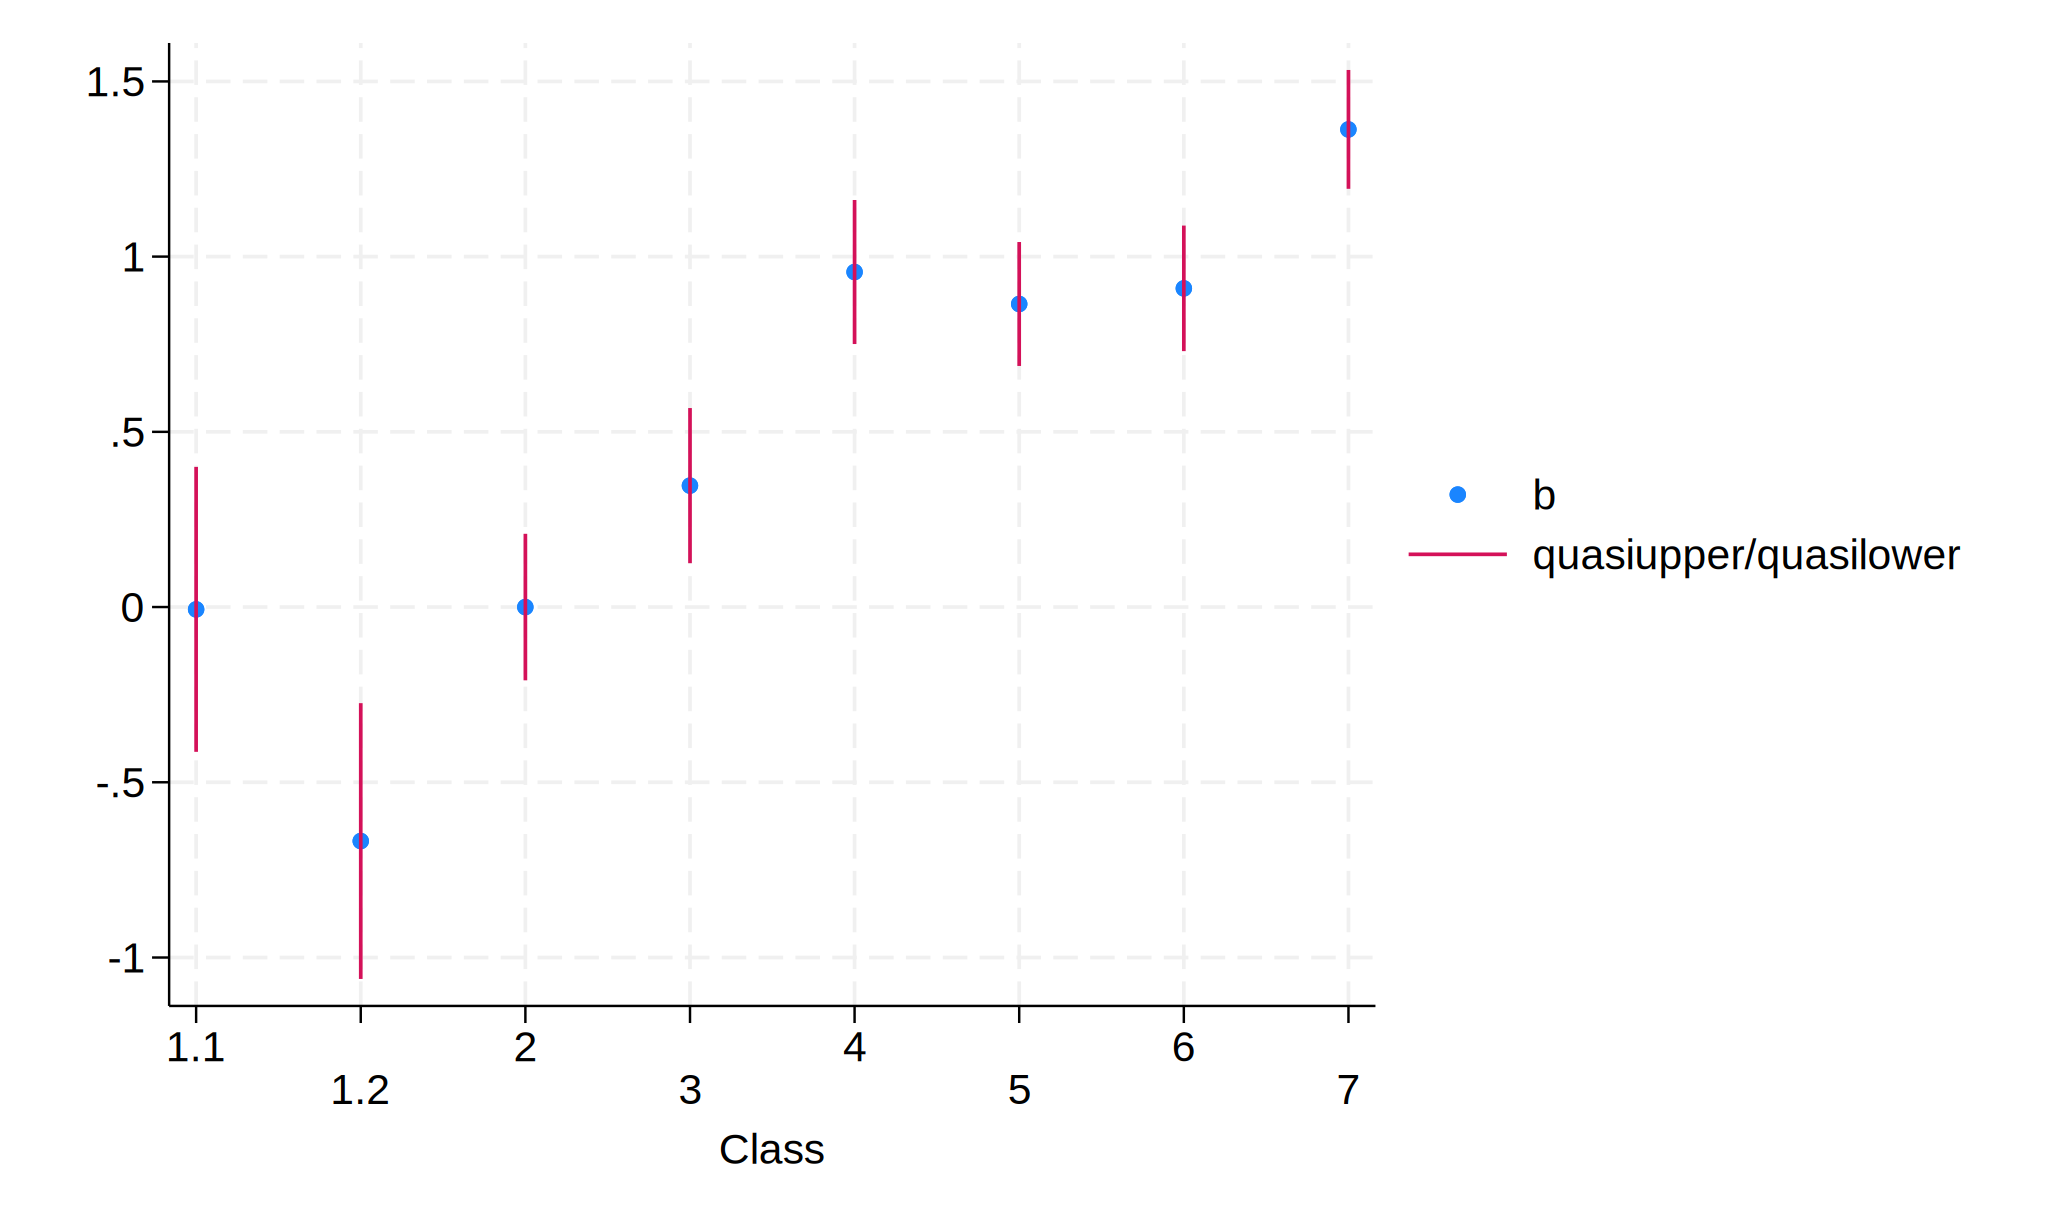

In [22]:
%%stata 

matrix define LB = e(qvlb)
matrix list LB

gen lba=LB[1,1] if _n==6
gen lbb=LB[2,1] if _n==2
gen lbc=LB[3,1] if _n==4
gen lbd=LB[4,1] if _n==8
gen lbe=LB[5,1] if _n==10
gen lbf=LB[6,1] if _n==12
gen lbg=LB[7,1] if _n==14
gen lbh=LB[8,1] if _n==16
egen quasilower = rowtotal(lba lbb lbc lbd lbe lbf lbg lbh)
replace quasilower=. if(quasilower==0)

matrix define UB = e(qvub)
matrix list UB

gen uba=UB[1,1] if _n==6
gen ubb=UB[2,1] if _n==2
gen ubc=UB[3,1] if _n==4
gen ubd=UB[4,1] if _n==8
gen ube=UB[5,1] if _n==10
gen ubf=UB[6,1] if _n==12
gen ubg=UB[7,1] if _n==14
gen ubh=UB[8,1] if _n==16
egen quasiupper = rowtotal(uba ubb ubc ubd ube ubf ubg ubh)
replace quasiupper=. if(quasiupper==0)

gen b=(quasilower+quasiupper)/2

gen group=_n if _n==6
replace group=_n if _n==2
replace group=_n if _n==4
replace group=_n if _n==8
replace group=_n if _n==10
replace group=_n if _n==12
replace group=_n if _n==14
replace group=_n if _n==16

label variable group "Class"
label define region 2 "1.1" 4 "1.2" 6 "2" 8 "3" 10 "4" 12 "5" 14 "6" 16 "7"
label value group region

graph twoway scatter b group ///
|| rspike quasiupper quasilower group, vert   /// 
xlabel(2 4 6 8 10 12 14 16, valuelabel alternate )


. 
. mlogit econ201 i.obin i.sex i.tenure i.qvnssec, b(3) 

Iteration 0:  Log likelihood = -11575.292  
Iteration 1:  Log likelihood = -8810.6401  
Iteration 2:  Log likelihood = -8712.2775  
Iteration 3:  Log likelihood = -8708.5637  
Iteration 4:  Log likelihood = -8708.5423  
Iteration 5:  Log likelihood = -8708.5423  

Multinomial logistic regression                        Number of obs =   8,448
                                                       LR chi2(40)   = 5733.50
                                                       Prob > chi2   =  0.0000
Log likelihood = -8708.5423                            Pseudo R2     =  0.2477

------------------------------------------------------------------------------
     econ201 | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
Employment   |
        obin |
>5 O-Levels  |  -3.585632   .0828947   -43.26   0.000    -3.748102   -3.423161
           

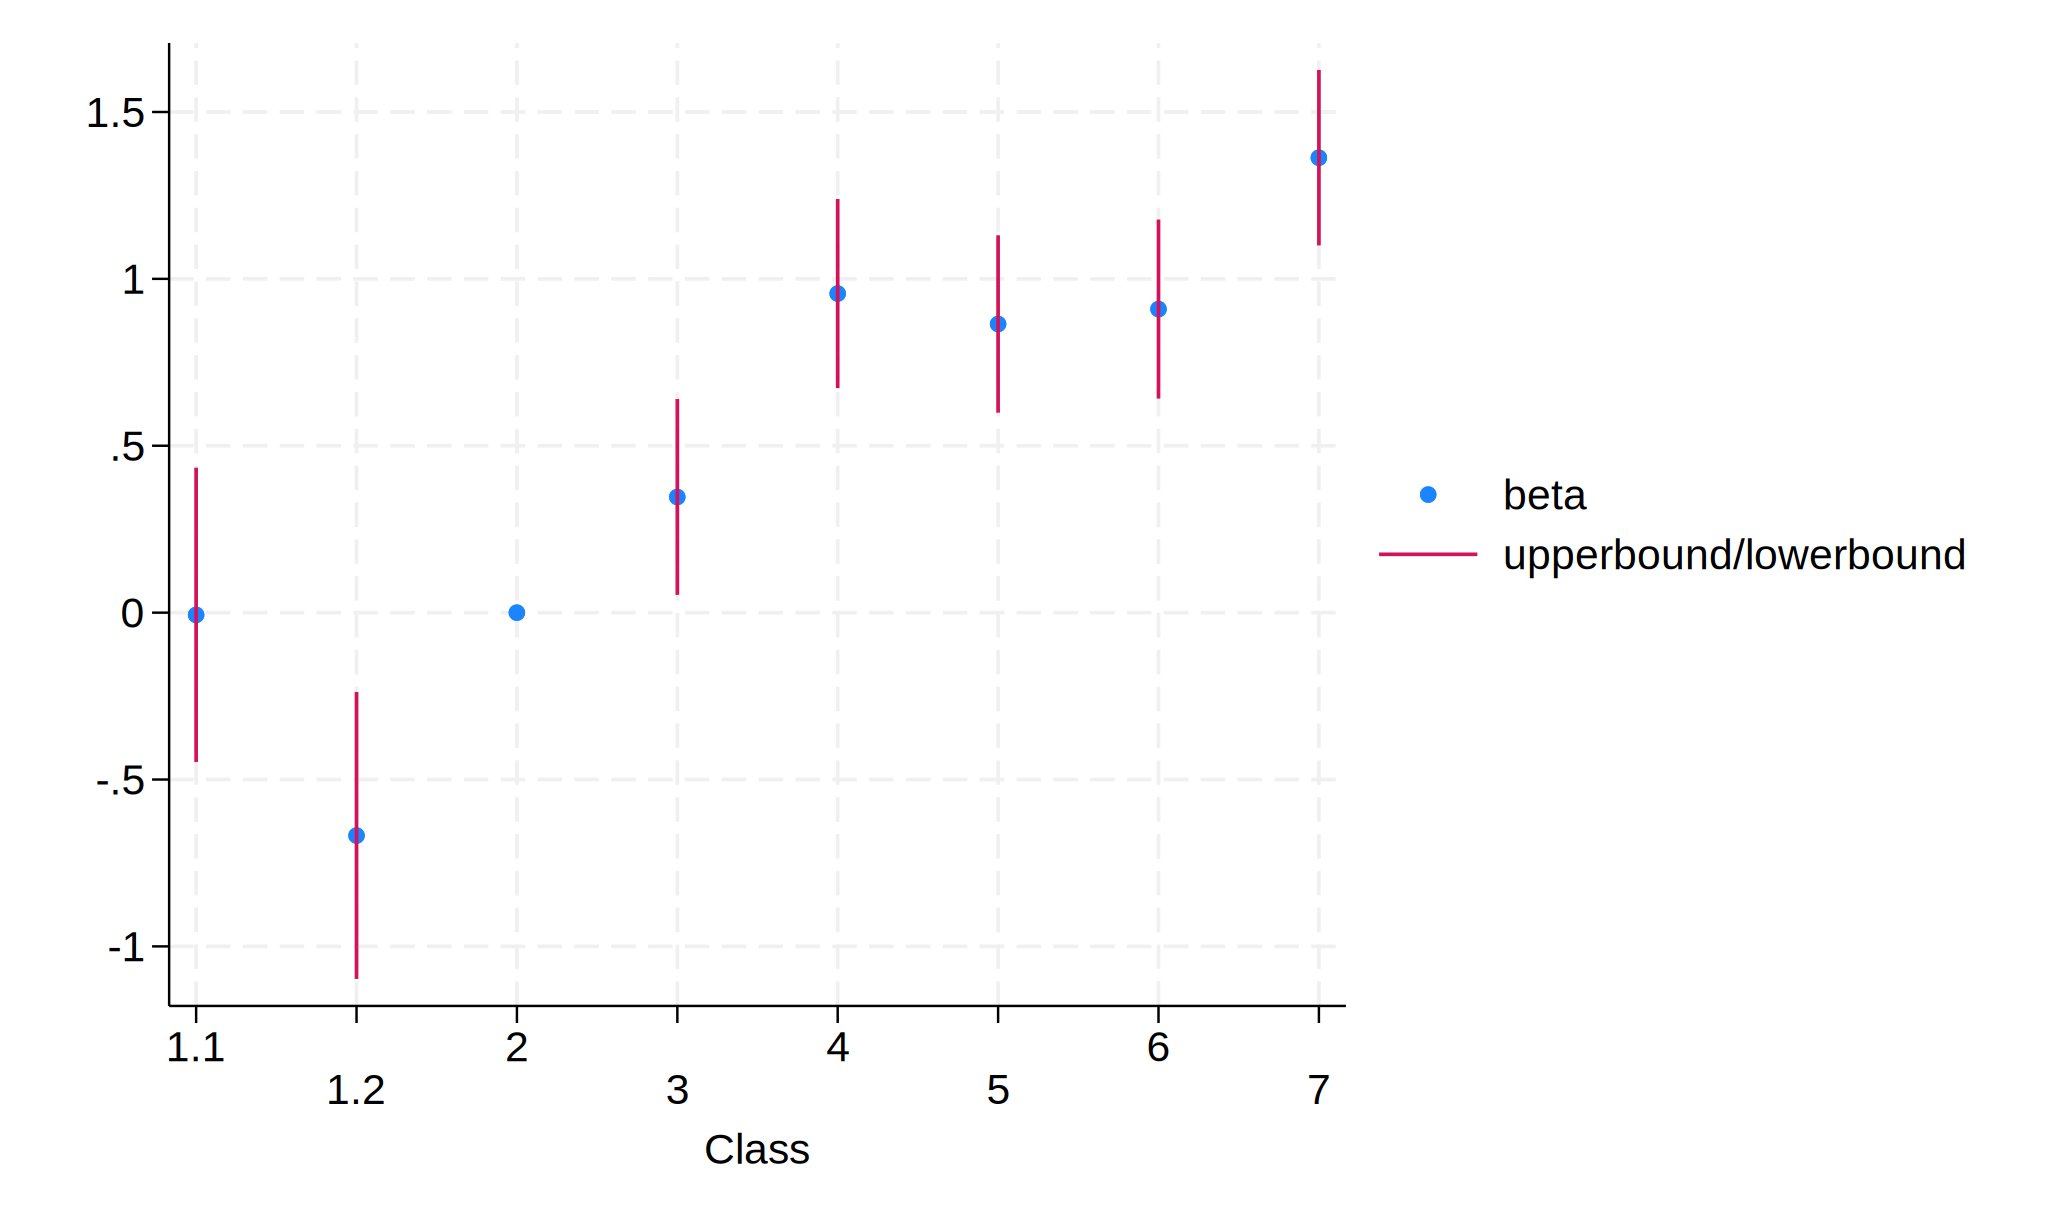

In [23]:
%%stata

mlogit econ201 i.obin i.sex i.tenure i.qvnssec, b(3) 
matrix list e(b)
matrix list r(table)
matrix define A = r(table)
matrix define A = A["ll".."ul", 1...]
matrix list A

gen lla=0 if _n==5
gen llb=A[1,8] if _n==1
gen llc=A[1,9] if _n==3
gen lld=A[1,10] if _n==7
gen lle=A[1,11] if _n==9
gen llf=A[1,12] if _n==11
gen llg=A[1,13] if _n==13
gen llh=A[1,14] if _n==15
egen lowerbound = rowtotal(lla llb llc lld lle llf llg llh)

gen ula=0 if _n==5
gen ulb=A[2,8] if _n==1
gen ulc=A[2,9] if _n==3
gen uld=A[2,10] if _n==7
gen ule=A[2,11] if _n==9
gen ulf=A[2,12] if _n==11
gen ulg=A[2,13] if _n==13
gen ulh=A[2,14] if _n==15
egen upperbound = rowtotal(ula ulb ulc uld ule ulf ulg ulh)

gen beta=(lowerbound+upperbound)/2

gen grouping=_n if _n==5
replace grouping=_n if _n==1
replace grouping=_n if _n==3
replace grouping=_n if _n==7
replace grouping=_n if _n==9
replace grouping=_n if _n==11
replace grouping=_n if _n==13
replace grouping=_n if _n==15
label variable grouping "Class"
label define regions 1 "1.1" 3 "1.2" 5 "2" 7 "3" 9 "4" 11 "5" 13 "6" 15 "7"
label value grouping regions

graph twoway scatter beta grouping ///
|| rspike upperbound lowerbound grouping, vert   /// 
xlabel(1 3 5 7 9 11 13 15, valuelabel alternate )


. 
. cd "G:\Stata data and do\Tables and Figures\Tables and Figuers for Chapter On
> e"
G:\Stata data and do\Tables and Figures\Tables and Figuers for Chapter One

. 
. graph twoway (scatter beta grouping, symbol(Oh) mcolor(black) legend(label(1 
> "Log Odds Coefficient")) legend(label(2 "Log Odds Confidence Intervals"))) ||
>  rspike upperbound lowerbound grouping, lcolor(black) || (scatter b group, ms
> ymbol(Dh) mcolor(red) legend(label(3 "Log Odds Coefficient")) legend(label(4 
> "Quasi-Variance Confidence Intervals"))) || rspike quasiupper quasilower grou
> p, lcolor(red) ///
> title("Predictions of Entering Employment Over School Post-Mandatory Schoolin
> g by Parental NS-SEC", size(vsmall) color(black)) ///
> subtitle("Confidence intervals of regression coefficients, by estimation meth
> od", size(vsmall) color(black)) ///
> note("Data Source: NCDS, N=8,448", size(vsmall) color(black)) ///
> caption("Educational Attainment, Sex, and Housing Tenure included in Model", 
> size(vs

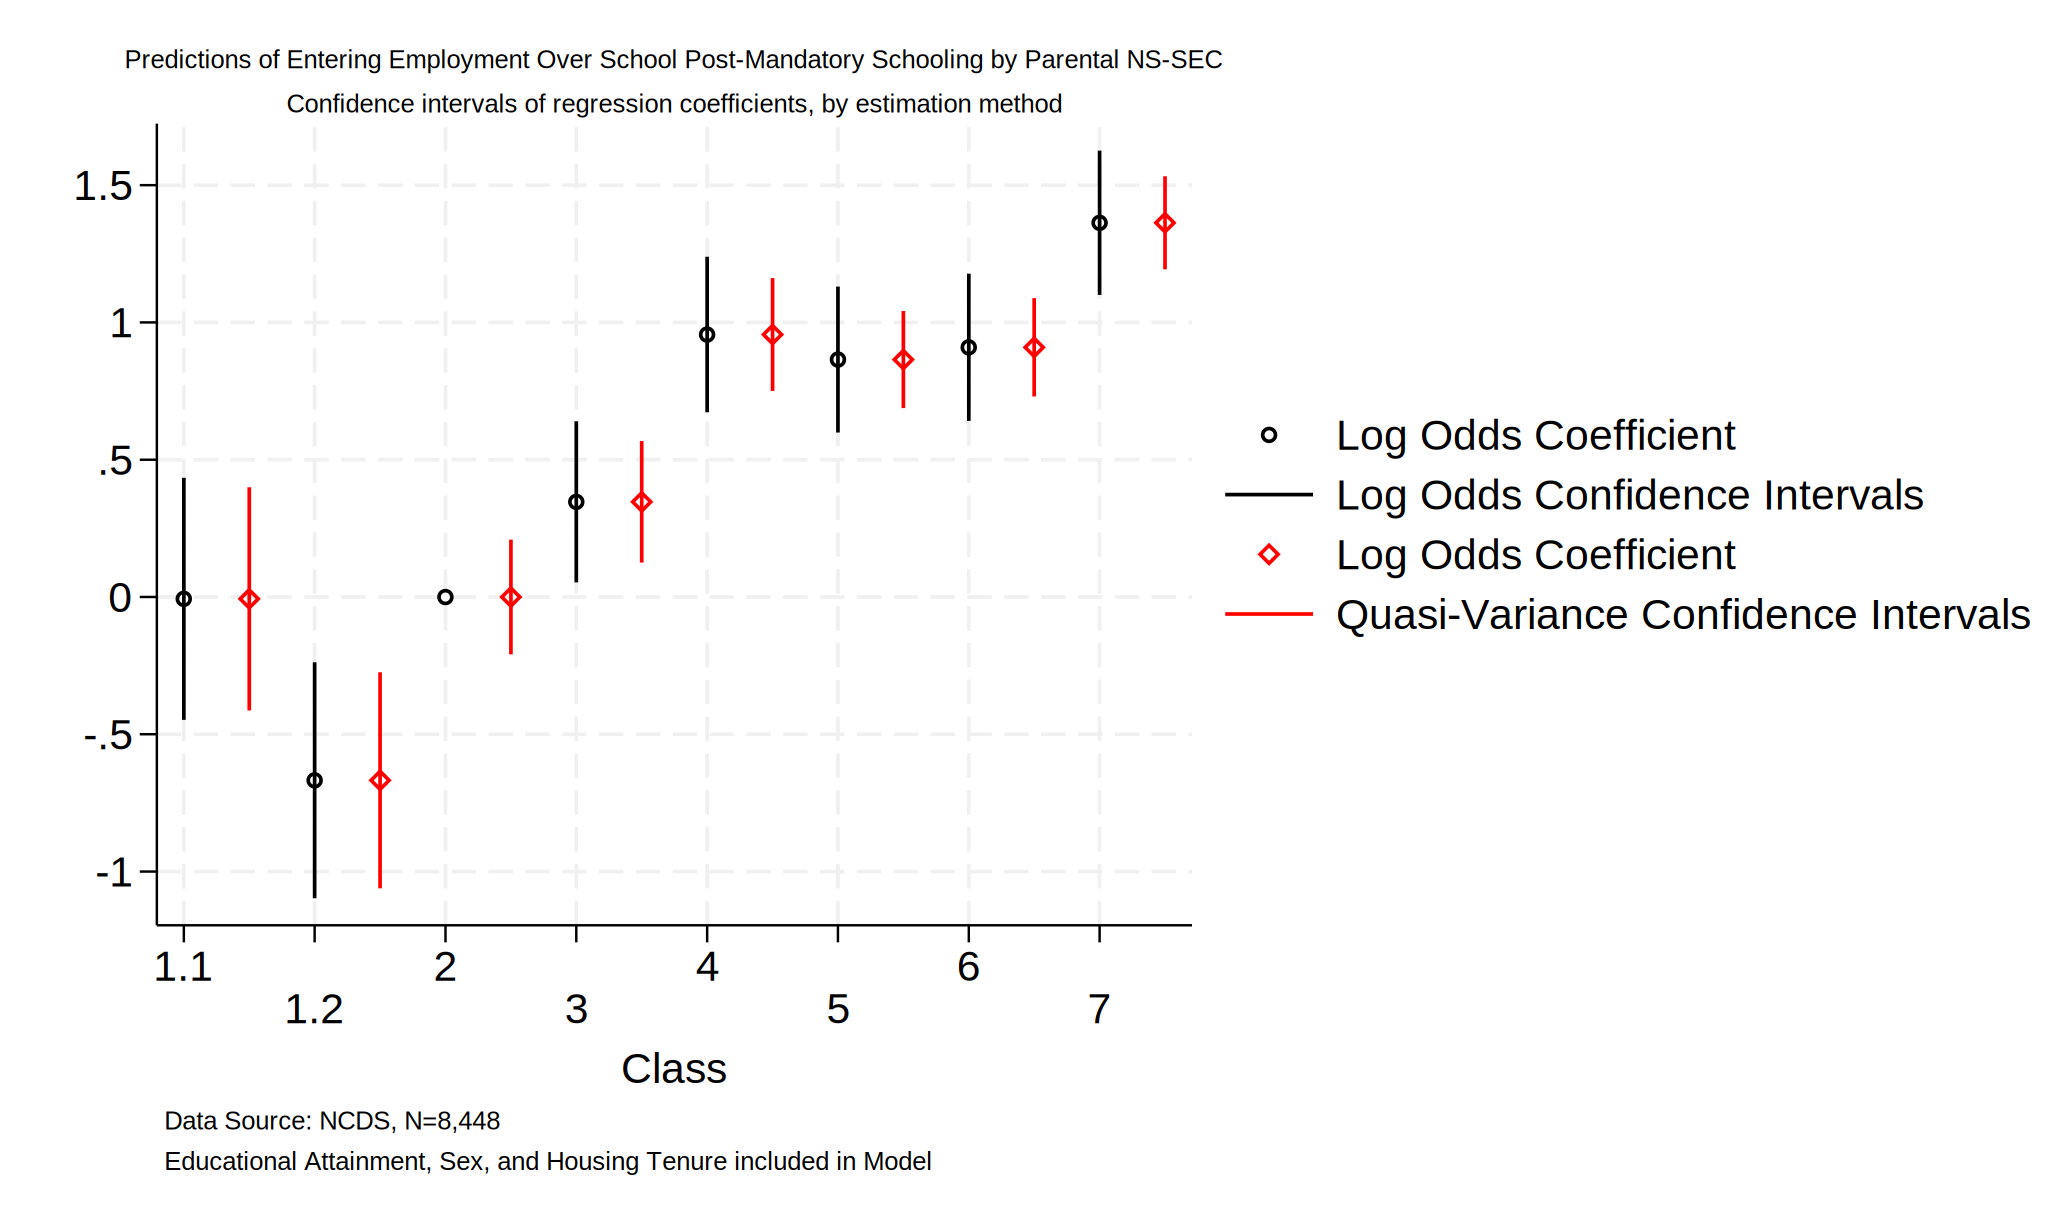

In [24]:
%%stata

cd "G:\Stata data and do\Tables and Figures\Tables and Figuers for Chapter One"

graph twoway (scatter beta grouping, symbol(Oh) mcolor(black) legend(label(1 "Log Odds Coefficient")) legend(label(2 "Log Odds Confidence Intervals"))) || rspike upperbound lowerbound grouping, lcolor(black) || (scatter b group, msymbol(Dh) mcolor(red) legend(label(3 "Log Odds Coefficient")) legend(label(4 "Quasi-Variance Confidence Intervals"))) || rspike quasiupper quasilower group, lcolor(red) ///
title("Predictions of Entering Employment Over School Post-Mandatory Schooling by Parental NS-SEC", size(vsmall) color(black)) ///
subtitle("Confidence intervals of regression coefficients, by estimation method", size(vsmall) color(black)) ///
note("Data Source: NCDS, N=8,448", size(vsmall) color(black)) ///
caption("Educational Attainment, Sex, and Housing Tenure included in Model", size(vsmall) color(black)) ///
xla(1 3 5 7 9 11 13 15, valuelabel alternate )

graph save "quasigraph", replace


. 
. gen qvecon1=.
(8,448 missing values generated)

. replace qvecon1=3 if(econ201==3)
(2,570 real changes made)

. replace qvecon1=1 if(econ201==2)
(745 real changes made)

. replace qvecon1=2 if(econ201==1)
(3,225 real changes made)

. replace qvecon1=4 if(econ201==4)
(1,646 real changes made)

. replace qvecon1=5 if(econ201==5)
(262 real changes made)

. 
. label define qvecon1_lbl 1"Non-Traditional Education" 2"Employment" 3"School"
>  4"Training & Apprenticeships" 5"Unemployment & OLF"

. label values qvecon1 qvecon1_lbl

. 
. mlogit qvecon1 i.obin i.sex i.tenure i.qvnssec, b(3)

Iteration 0:  Log likelihood = -11575.292  
Iteration 1:  Log likelihood = -8810.6401  
Iteration 2:  Log likelihood = -8712.2775  
Iteration 3:  Log likelihood = -8708.5637  
Iteration 4:  Log likelihood = -8708.5423  
Iteration 5:  Log likelihood = -8708.5423  

Multinomial logistic regression                        Number of obs =   8,448
                                                       LR chi2

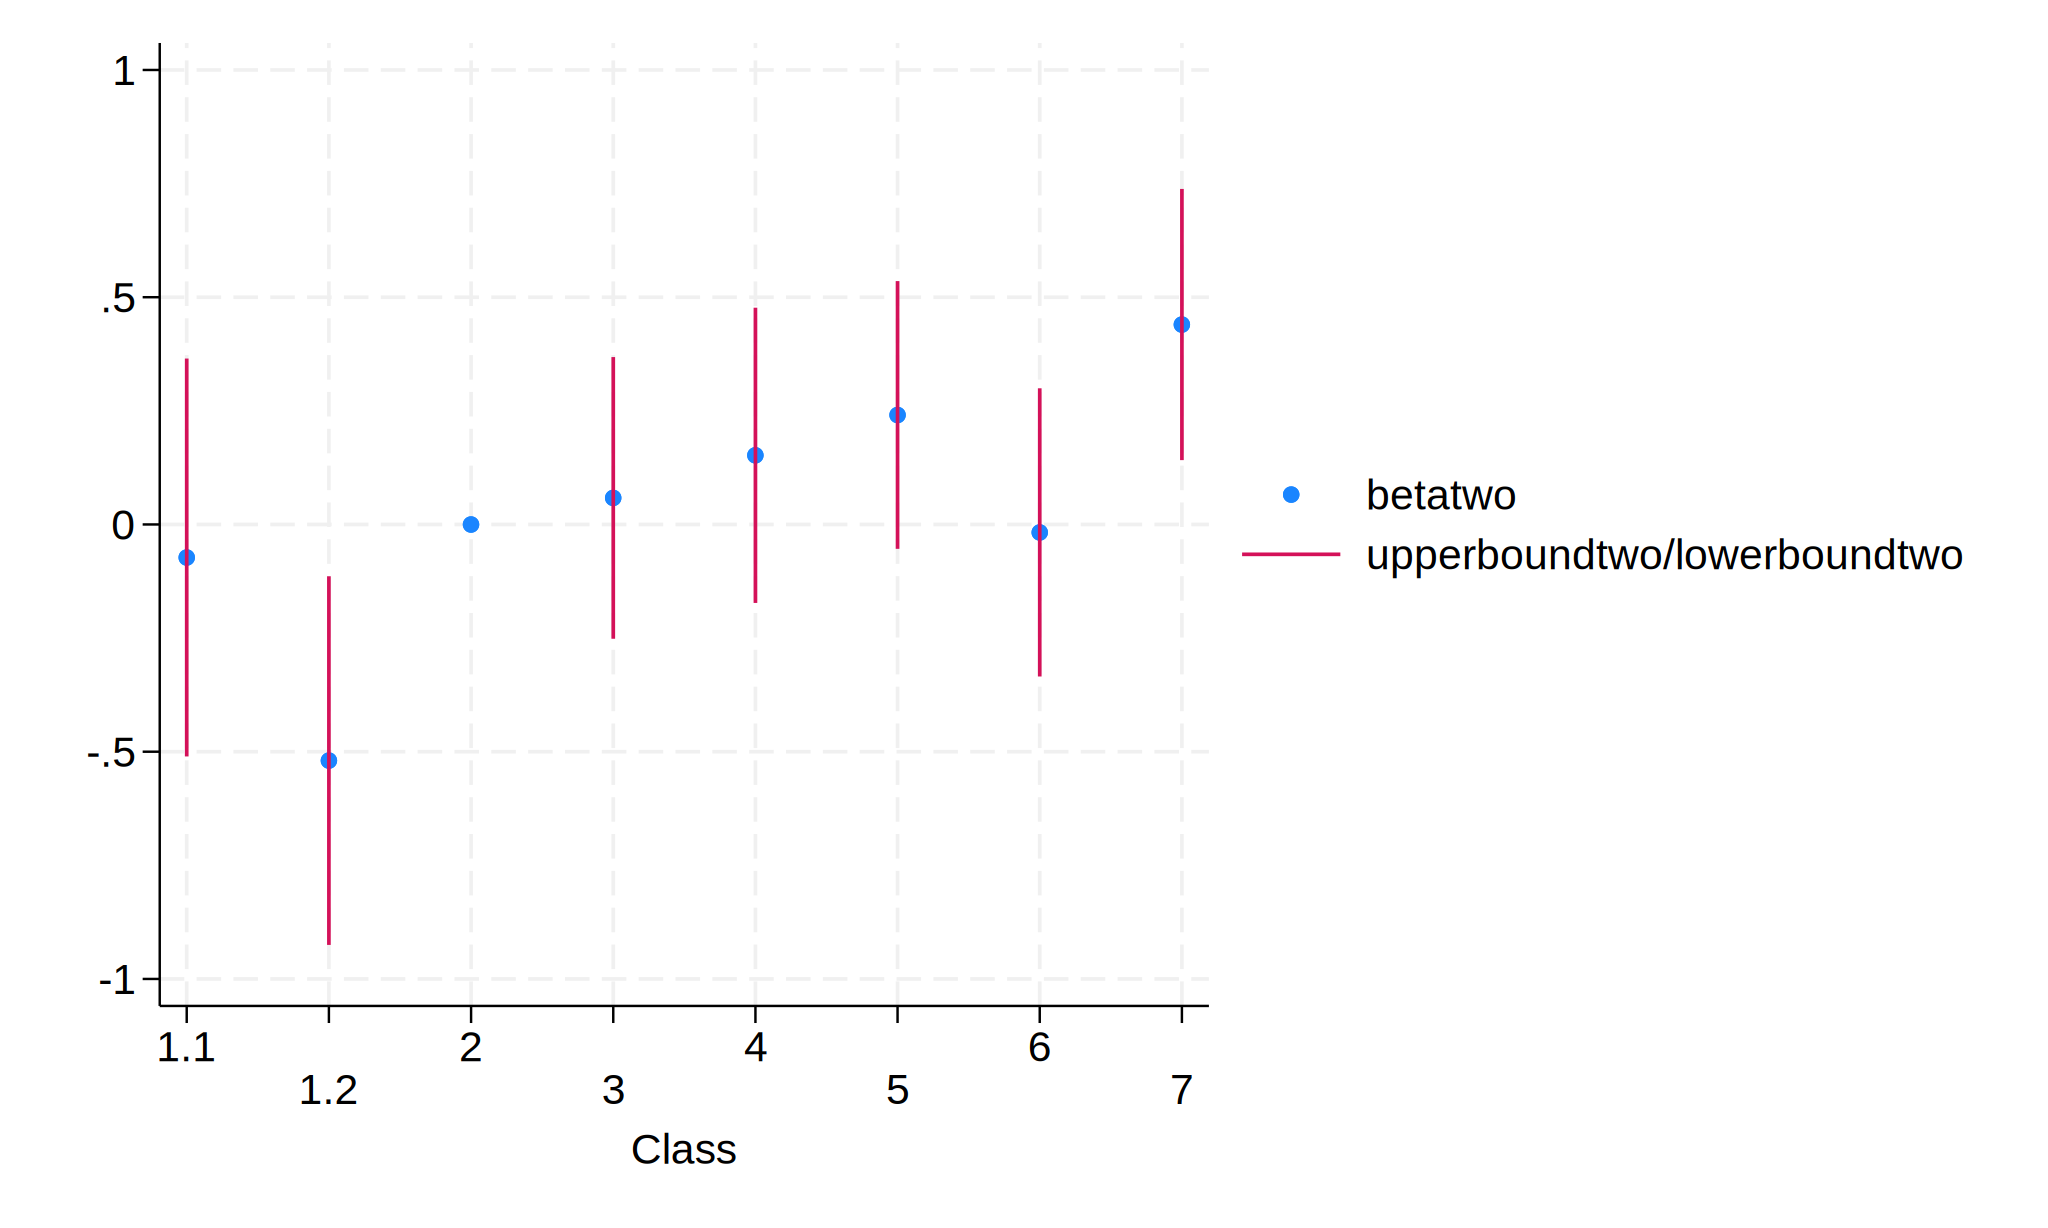

In [25]:
%%stata

gen qvecon1=.
replace qvecon1=3 if(econ201==3)
replace qvecon1=1 if(econ201==2)
replace qvecon1=2 if(econ201==1)
replace qvecon1=4 if(econ201==4)
replace qvecon1=5 if(econ201==5)

label define qvecon1_lbl 1"Non-Traditional Education" 2"Employment" 3"School" 4"Training & Apprenticeships" 5"Unemployment & OLF"
label values qvecon1 qvecon1_lbl

mlogit qvecon1 i.obin i.sex i.tenure i.qvnssec, b(3)

qv i.qvnssec

matrix define LBtwo = e(qvlb)
matrix list LBtwo

gen lbatwo=LBtwo[1,1] if _n==6
gen lbbtwo=LBtwo[2,1] if _n==2
gen lbctwo=LBtwo[3,1] if _n==4
gen lbdtwo=LBtwo[4,1] if _n==8
gen lbetwo=LBtwo[5,1] if _n==10
gen lbftwo=LBtwo[6,1] if _n==12
gen lbgtwo=LBtwo[7,1] if _n==14
gen lbhtwo=LBtwo[8,1] if _n==16
egen quasilowertwo = rowtotal(lbatwo lbbtwo lbctwo lbdtwo lbetwo lbftwo lbgtwo lbhtwo)
replace quasilowertwo=. if(quasilowertwo==0)

matrix define UBtwo = e(qvub)
matrix list UBtwo

gen ubatwo=UBtwo[1,1] if _n==6
gen ubbtwo=UBtwo[2,1] if _n==2
gen ubctwo=UBtwo[3,1] if _n==4
gen ubdtwo=UBtwo[4,1] if _n==8
gen ubetwo=UBtwo[5,1] if _n==10
gen ubftwo=UBtwo[6,1] if _n==12
gen ubgtwo=UBtwo[7,1] if _n==14
gen ubhtwo=UBtwo[8,1] if _n==16
egen quasiuppertwo = rowtotal(ubatwo ubbtwo ubctwo ubdtwo ubetwo ubftwo ubgtwo ubhtwo)
replace quasiuppertwo=. if(quasiuppertwo==0)

gen btwo=(quasilowertwo+quasiuppertwo)/2

gen grouptwo=_n if _n==6
replace grouptwo=_n if _n==2
replace grouptwo=_n if _n==4
replace grouptwo=_n if _n==8
replace grouptwo=_n if _n==10
replace grouptwo=_n if _n==12
replace grouptwo=_n if _n==14
replace grouptwo=_n if _n==16

label variable grouptwo "Class"
label define regiontwo 2 "1.1" 4 "1.2" 6 "2" 8 "3" 10 "4" 12 "5" 14 "6" 16 "7"
label value grouptwo regiontwo

graph twoway scatter btwo grouptwo ///
|| rspike quasiuppertwo quasilowertwo grouptwo, vert   /// 
xlabel(2 4 6 8 10 12 14 16, valuelabel alternate )

mlogit qvecon1 i.obin i.sex i.tenure i.qvnssec, b(3)

matrix list e(b)
matrix list r(table)
matrix define Atwo = r(table)
matrix define Atwo = Atwo["ll".."ul", 1...]
matrix list Atwo

gen llatwo=0 if _n==5
gen llbtwo=Atwo[1,8] if _n==1
gen llctwo=Atwo[1,9] if _n==3
gen lldtwo=Atwo[1,10] if _n==7
gen lletwo=Atwo[1,11] if _n==9
gen llftwo=Atwo[1,12] if _n==11
gen llgtwo=Atwo[1,13] if _n==13
gen llhtwo=Atwo[1,14] if _n==15
egen lowerboundtwo = rowtotal(llatwo llbtwo llctwo lldtwo lletwo llftwo llgtwo llhtwo)

gen ulatwo=0 if _n==5
gen ulbtwo=Atwo[2,8] if _n==1
gen ulctwo=Atwo[2,9] if _n==3
gen uldtwo=Atwo[2,10] if _n==7
gen uletwo=Atwo[2,11] if _n==9
gen ulftwo=Atwo[2,12] if _n==11
gen ulgtwo=Atwo[2,13] if _n==13
gen ulhtwo=Atwo[2,14] if _n==15
egen upperboundtwo = rowtotal(ulatwo ulbtwo ulctwo uldtwo uletwo ulftwo ulgtwo ulhtwo)

gen betatwo=(lowerboundtwo+upperboundtwo)/2

gen groupingtwo=_n if _n==5
replace groupingtwo=_n if _n==1
replace groupingtwo=_n if _n==3
replace groupingtwo=_n if _n==7
replace groupingtwo=_n if _n==9
replace groupingtwo=_n if _n==11
replace groupingtwo=_n if _n==13
replace groupingtwo=_n if _n==15
label variable groupingtwo "Class"
label define regionstwo 1 "1.1" 3 "1.2" 5 "2" 7 "3" 9 "4" 11 "5" 13 "6" 15 "7"
label value groupingtwo regionstwo

graph twoway scatter betatwo groupingtwo ///
|| rspike upperboundtwo lowerboundtwo groupingtwo, vert   /// 
xlabel(1 3 5 7 9 11 13 15, valuelabel alternate )


. 
. graph twoway (scatter betatwo groupingtwo, symbol(Oh) mcolor(black) legend(la
> bel(1 "Log Odds Coefficient")) legend(label(2 "Log Odds Confidence Intervals"
> ))) || rspike upperboundtwo lowerboundtwo groupingtwo, lcolor(black) || (scat
> ter btwo grouptwo, msymbol(Dh) mcolor(red) legend(label(3 "Log Odds Coefficie
> nt")) legend(label(4 "Quasi-Variance Confidence Intervals"))) || rspike quasi
> uppertwo quasilowertwo grouptwo, lcolor(red) ///
> title("Predictions of Entering Non-Traditional Education Over School Post-Man
> datory Schooling by Parental NS-SEC", size(vsmall) color(black)) ///
> subtitle("Confidence intervals of regression coefficients, by estimation meth
> od", size(vsmall) color(black)) ///
> note("Data Source: NCDS, N=8,448", size(vsmall) color(black)) ///
> caption("Educational Attainment, Sex, and Housing Tenure included in Model", 
> size(vsmall) color(black)) ///
> xla(1 3 5 7 9 11 13 15, valuelabel alternate )

. 
. graph save "quasigraphtwo", replace
file

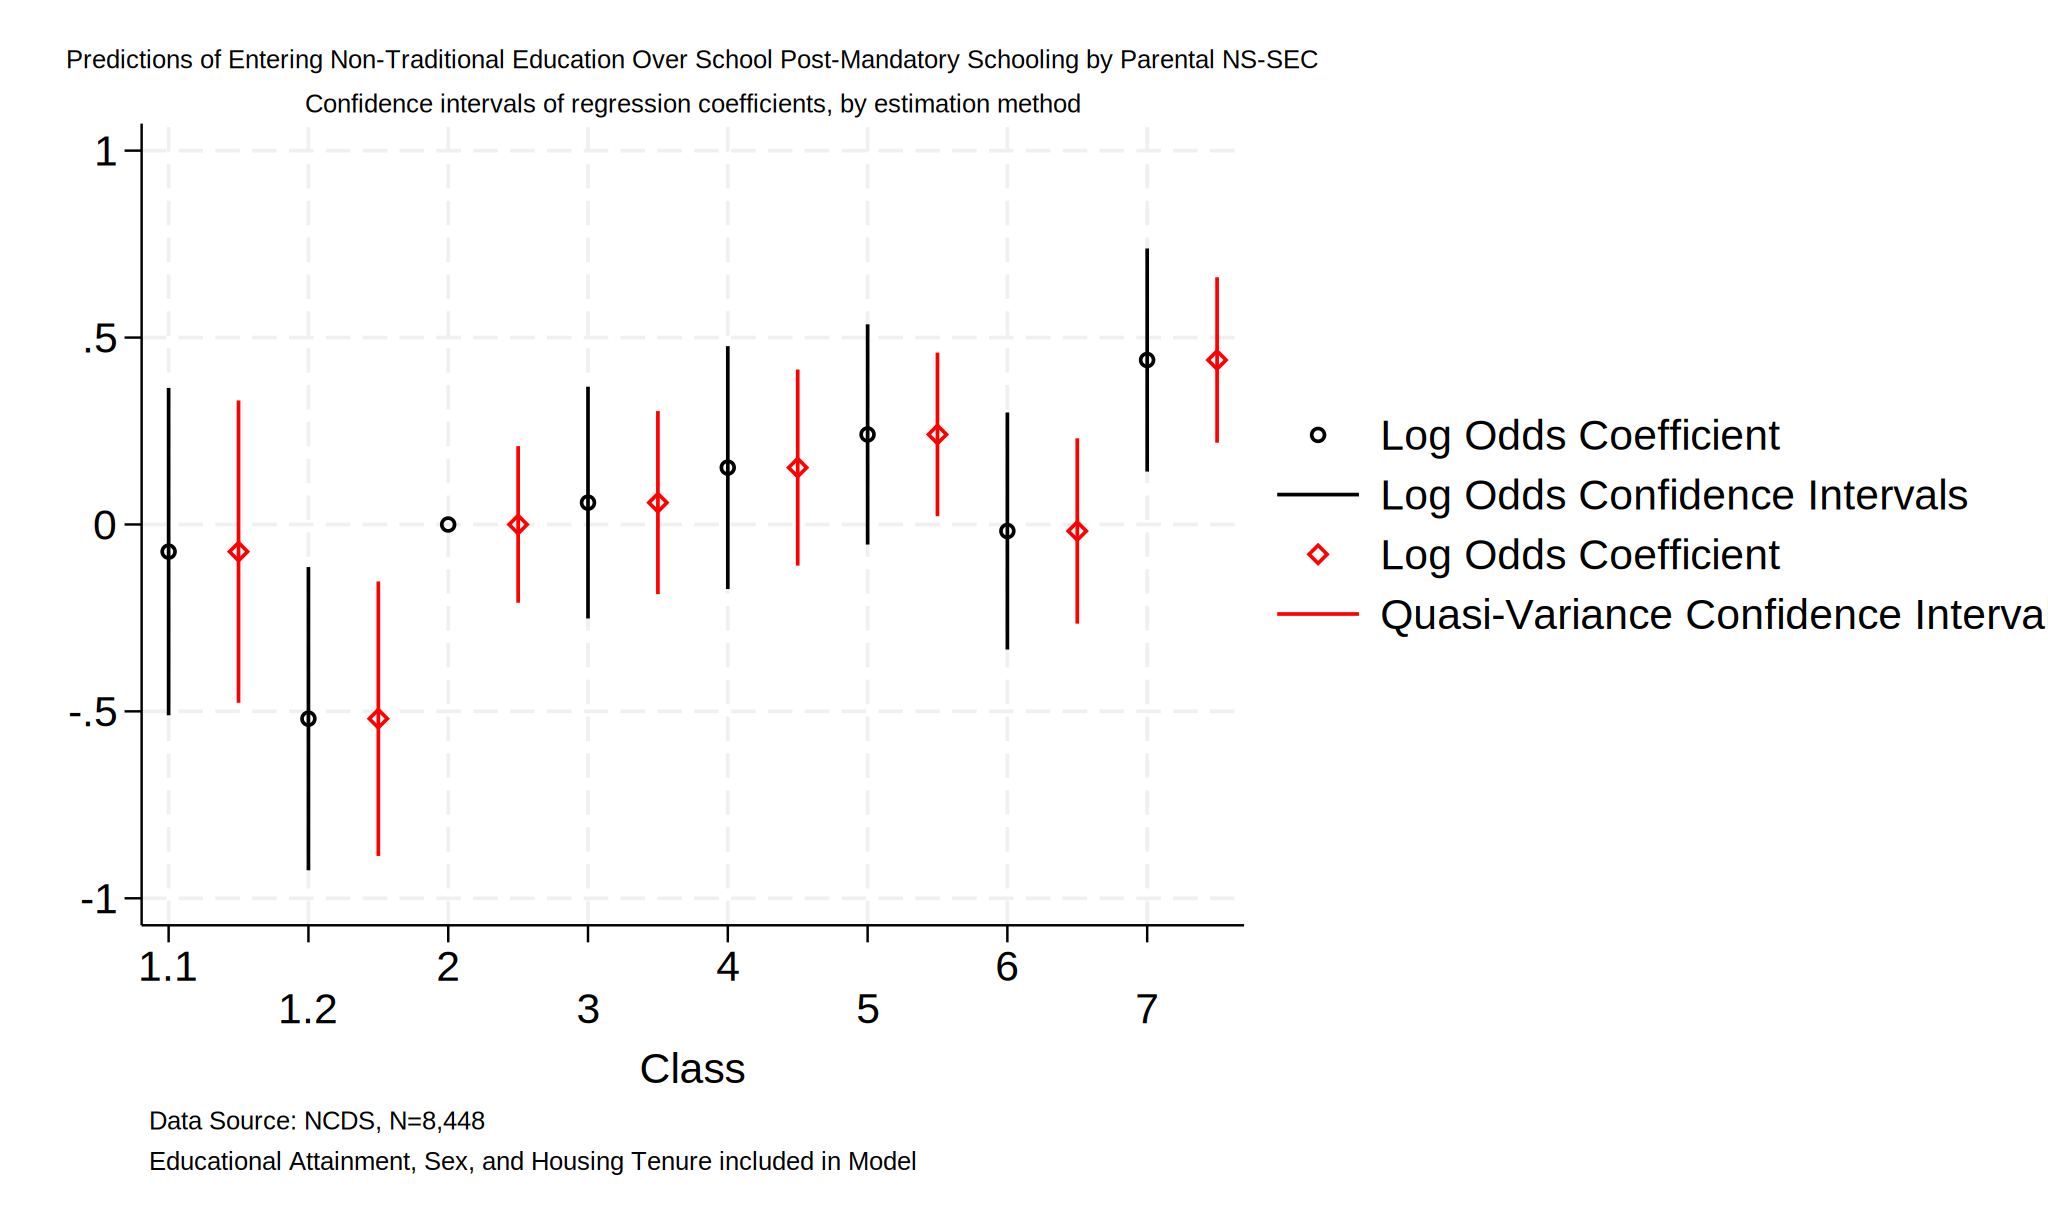

In [26]:
%%stata

graph twoway (scatter betatwo groupingtwo, symbol(Oh) mcolor(black) legend(label(1 "Log Odds Coefficient")) legend(label(2 "Log Odds Confidence Intervals"))) || rspike upperboundtwo lowerboundtwo groupingtwo, lcolor(black) || (scatter btwo grouptwo, msymbol(Dh) mcolor(red) legend(label(3 "Log Odds Coefficient")) legend(label(4 "Quasi-Variance Confidence Intervals"))) || rspike quasiuppertwo quasilowertwo grouptwo, lcolor(red) ///
title("Predictions of Entering Non-Traditional Education Over School Post-Mandatory Schooling by Parental NS-SEC", size(vsmall) color(black)) ///
subtitle("Confidence intervals of regression coefficients, by estimation method", size(vsmall) color(black)) ///
note("Data Source: NCDS, N=8,448", size(vsmall) color(black)) ///
caption("Educational Attainment, Sex, and Housing Tenure included in Model", size(vsmall) color(black)) ///
xla(1 3 5 7 9 11 13 15, valuelabel alternate )

graph save "quasigraphtwo", replace


. 
. gen qvecon2=.
(8,448 missing values generated)

. replace qvecon2=3 if(econ201==3)
(2,570 real changes made)

. replace qvecon2=4 if(econ201==2)
(745 real changes made)

. replace qvecon2=2 if(econ201==1)
(3,225 real changes made)

. replace qvecon2=1 if(econ201==4)
(1,646 real changes made)

. replace qvecon2=5 if(econ201==5)
(262 real changes made)

. 
. label define qvecon2_lbl 1"Training & Apprenticeships" 2"Employment" 3"School
> " 4"Non-Traditional Education" 5"Unemployment & OLF"

. label values qvecon2 qvecon2_lbl

. 
. mlogit qvecon2 i.obin i.sex i.tenure i.qvnssec, b(3)

Iteration 0:  Log likelihood = -11575.292  
Iteration 1:  Log likelihood = -8810.6401  
Iteration 2:  Log likelihood = -8712.2775  
Iteration 3:  Log likelihood = -8708.5637  
Iteration 4:  Log likelihood = -8708.5423  
Iteration 5:  Log likelihood = -8708.5423  

Multinomial logistic regression                        Number of obs =   8,448
                                                       LR chi2

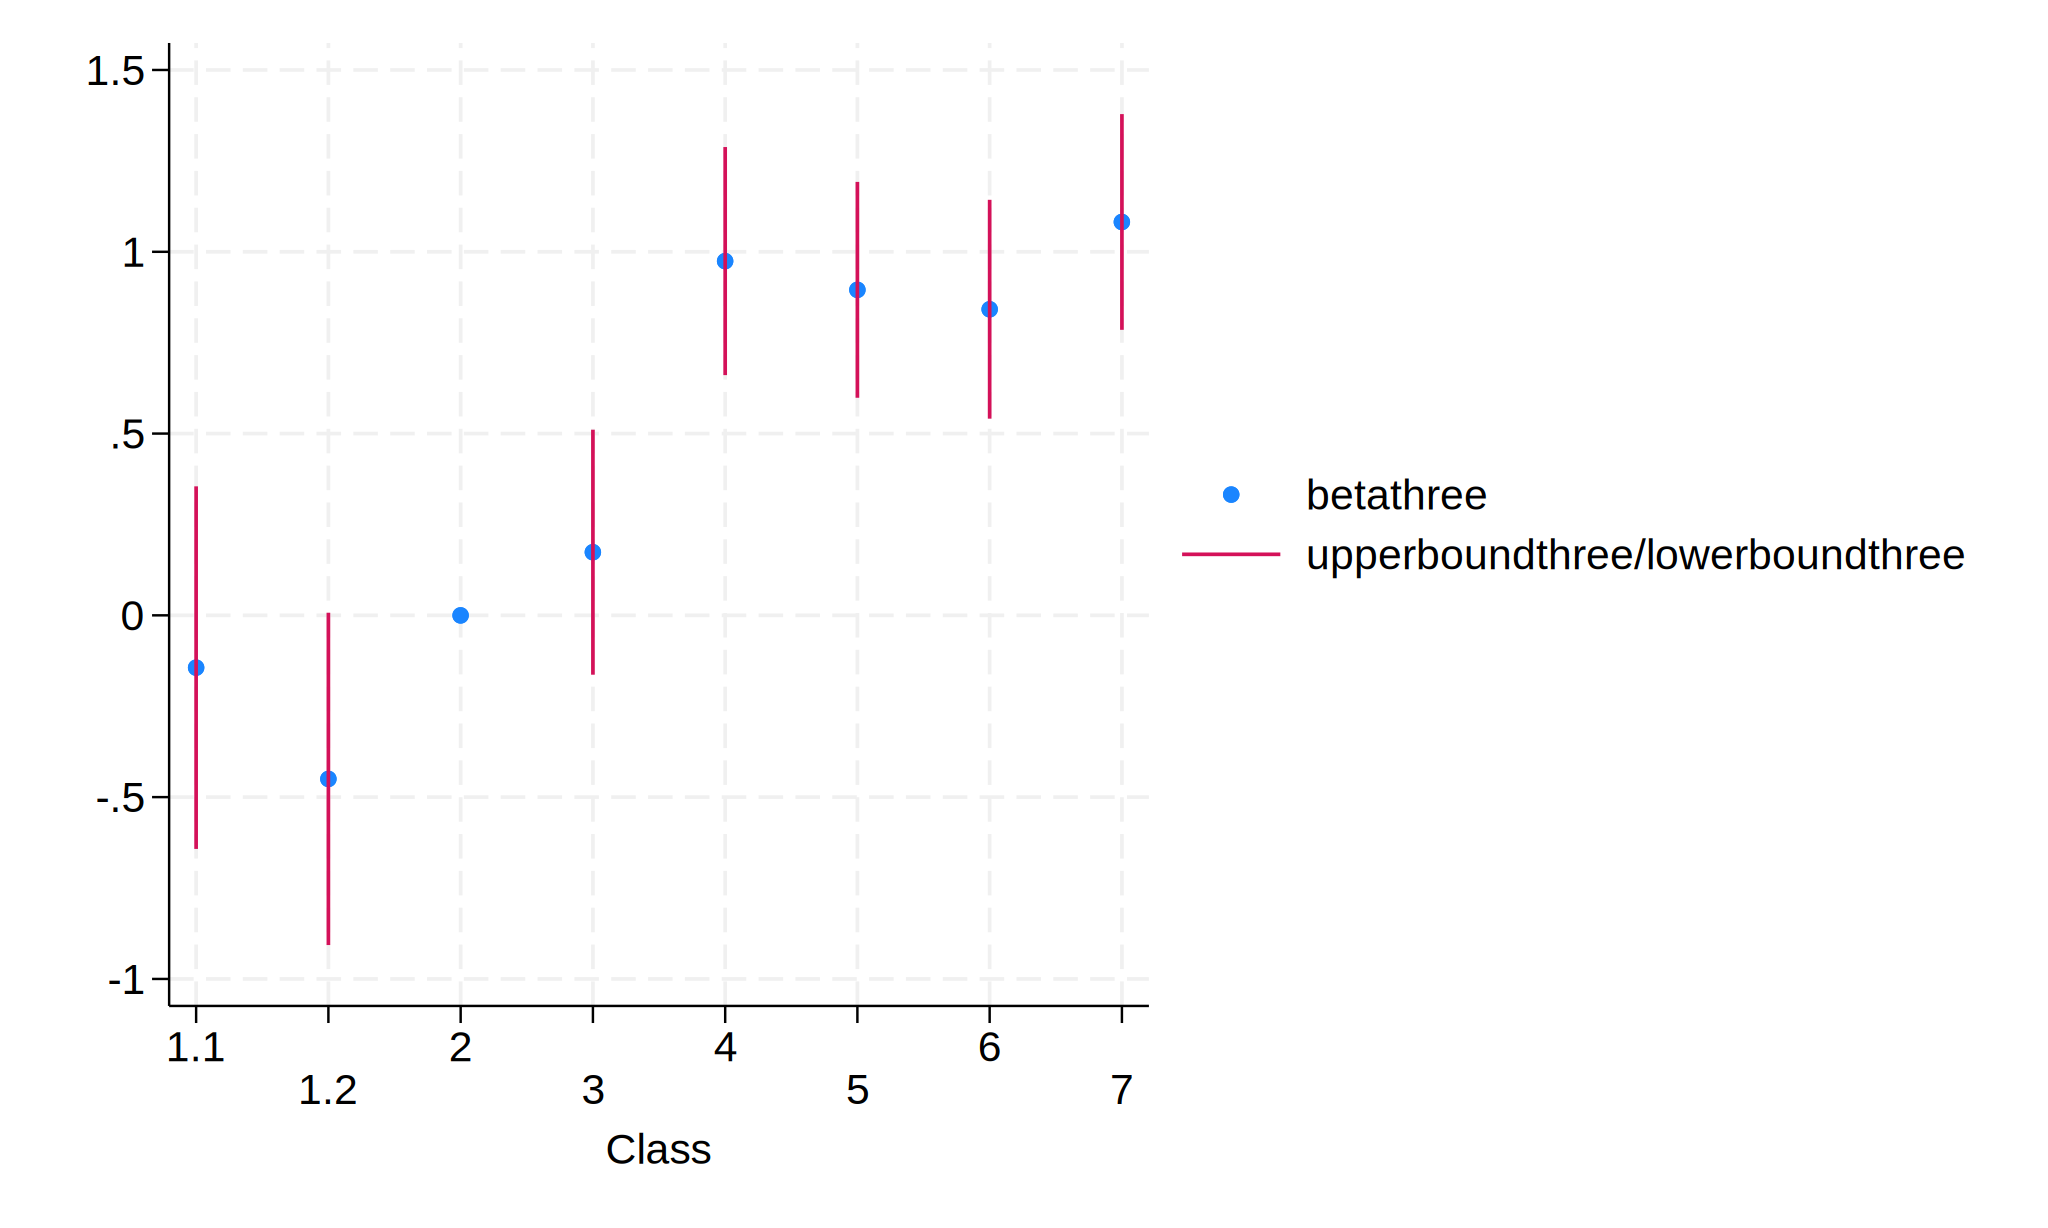

In [27]:
%%stata

gen qvecon2=.
replace qvecon2=3 if(econ201==3)
replace qvecon2=4 if(econ201==2)
replace qvecon2=2 if(econ201==1)
replace qvecon2=1 if(econ201==4)
replace qvecon2=5 if(econ201==5)

label define qvecon2_lbl 1"Training & Apprenticeships" 2"Employment" 3"School" 4"Non-Traditional Education" 5"Unemployment & OLF"
label values qvecon2 qvecon2_lbl

mlogit qvecon2 i.obin i.sex i.tenure i.qvnssec, b(3)

qv i.qvnssec

matrix define LBthree = e(qvlb)
matrix list LBthree

gen lbathree=LBthree[1,1] if _n==6
gen lbbthree=LBthree[2,1] if _n==2
gen lbcthree=LBthree[3,1] if _n==4
gen lbdthree=LBthree[4,1] if _n==8
gen lbethree=LBthree[5,1] if _n==10
gen lbfthree=LBthree[6,1] if _n==12
gen lbgthree=LBthree[7,1] if _n==14
gen lbhthree=LBthree[8,1] if _n==16
egen quasilowerthree = rowtotal(lbathree lbbthree lbcthree lbdthree lbethree lbfthree lbgthree lbhthree)
replace quasilowerthree=. if(quasilowerthree==0)

matrix define UBthree = e(qvub)
matrix list UBthree

gen ubathree=UBthree[1,1] if _n==6
gen ubbthree=UBthree[2,1] if _n==2
gen ubcthree=UBthree[3,1] if _n==4
gen ubdthree=UBthree[4,1] if _n==8
gen ubethree=UBthree[5,1] if _n==10
gen ubfthree=UBthree[6,1] if _n==12
gen ubgthree=UBthree[7,1] if _n==14
gen ubhthree=UBthree[8,1] if _n==16
egen quasiupperthree = rowtotal(ubathree ubbthree ubcthree ubdthree ubethree ubfthree ubgthree ubhthree)
replace quasiupperthree=. if(quasiupperthree==0)

gen bthree=(quasilowerthree+quasiupperthree)/2

gen groupthree=_n if _n==6
replace groupthree=_n if _n==2
replace groupthree=_n if _n==4
replace groupthree=_n if _n==8
replace groupthree=_n if _n==10
replace groupthree=_n if _n==12
replace groupthree=_n if _n==14
replace groupthree=_n if _n==16

label variable groupthree "Class"
label define regionthree 2 "1.1" 4 "1.2" 6 "2" 8 "3" 10 "4" 12 "5" 14 "6" 16 "7"
label value groupthree regionthree

graph twoway scatter bthree groupthree ///
|| rspike quasiupperthree quasilowerthree groupthree, vert   /// 
xlabel(2 4 6 8 10 12 14 16, valuelabel alternate )

mlogit qvecon2 i.obin i.sex i.tenure i.qvnssec, b(3)

matrix list e(b)
matrix list r(table)
matrix define Athree = r(table)
matrix define Athree = Athree["ll".."ul", 1...]
matrix list Athree

gen llathree=0 if _n==5
gen llbthree=Athree[1,8] if _n==1
gen llcthree=Athree[1,9] if _n==3
gen lldthree=Athree[1,10] if _n==7
gen llethree=Athree[1,11] if _n==9
gen llfthree=Athree[1,12] if _n==11
gen llgthree=Athree[1,13] if _n==13
gen llhthree=Athree[1,14] if _n==15
egen lowerboundthree = rowtotal(llathree llbthree llcthree lldthree llethree llfthree llgthree llhthree)

gen ulathree=0 if _n==5
gen ulbthree=Athree[2,8] if _n==1
gen ulcthree=Athree[2,9] if _n==3
gen uldthree=Athree[2,10] if _n==7
gen ulethree=Athree[2,11] if _n==9
gen ulfthree=Athree[2,12] if _n==11
gen ulgthree=Athree[2,13] if _n==13
gen ulhthree=Athree[2,14] if _n==15
egen upperboundthree = rowtotal(ulathree ulbthree ulcthree uldthree ulethree ulfthree ulgthree ulhthree)

gen betathree=(lowerboundthree+upperboundthree)/2

gen groupingthree=_n if _n==5
replace groupingthree=_n if _n==1
replace groupingthree=_n if _n==3
replace groupingthree=_n if _n==7
replace groupingthree=_n if _n==9
replace groupingthree=_n if _n==11
replace groupingthree=_n if _n==13
replace groupingthree=_n if _n==15
label variable groupingthree "Class"
label define regionsthree 1 "1.1" 3 "1.2" 5 "2" 7 "3" 9 "4" 11 "5" 13 "6" 15 "7"
label value groupingthree regionsthree

graph twoway scatter betathree groupingthree ///
|| rspike upperboundthree lowerboundthree groupingthree, vert   /// 
xlabel(1 3 5 7 9 11 13 15, valuelabel alternate )


. 
. graph twoway (scatter betathree groupingthree, symbol(Oh) mcolor(black) legen
> d(label(1 "Log Odds Coefficient")) legend(label(2 "Log Odds Confidence Interv
> als"))) || rspike upperboundthree lowerboundthree groupingthree, lcolor(black
> ) || (scatter bthree groupthree, msymbol(Dh) mcolor(red) legend(label(3 "Log 
> Odds Coefficient")) legend(label(4 "Quasi-Variance Confidence Intervals"))) |
> | rspike quasiupperthree quasilowerthree groupthree, lcolor(red) ///
> title("Predictions of Entering Training & Apprenticeships Over School Post-Ma
> ndatory Schooling by Parental NS-SEC", size(vsmall) color(black)) ///
> subtitle("Confidence intervals of regression coefficients, by estimation meth
> od", size(vsmall) color(black)) ///
> note("Data Source: NCDS, N=8,448", size(vsmall) color(black)) ///
> caption("Educational Attainment, Sex, and Housing Tenure included in Model.",
>  size(vsmall) color(black)) ///
> xla(1 3 5 7 9 11 13 15, valuelabel alternate )

. 
. graph save "quasig

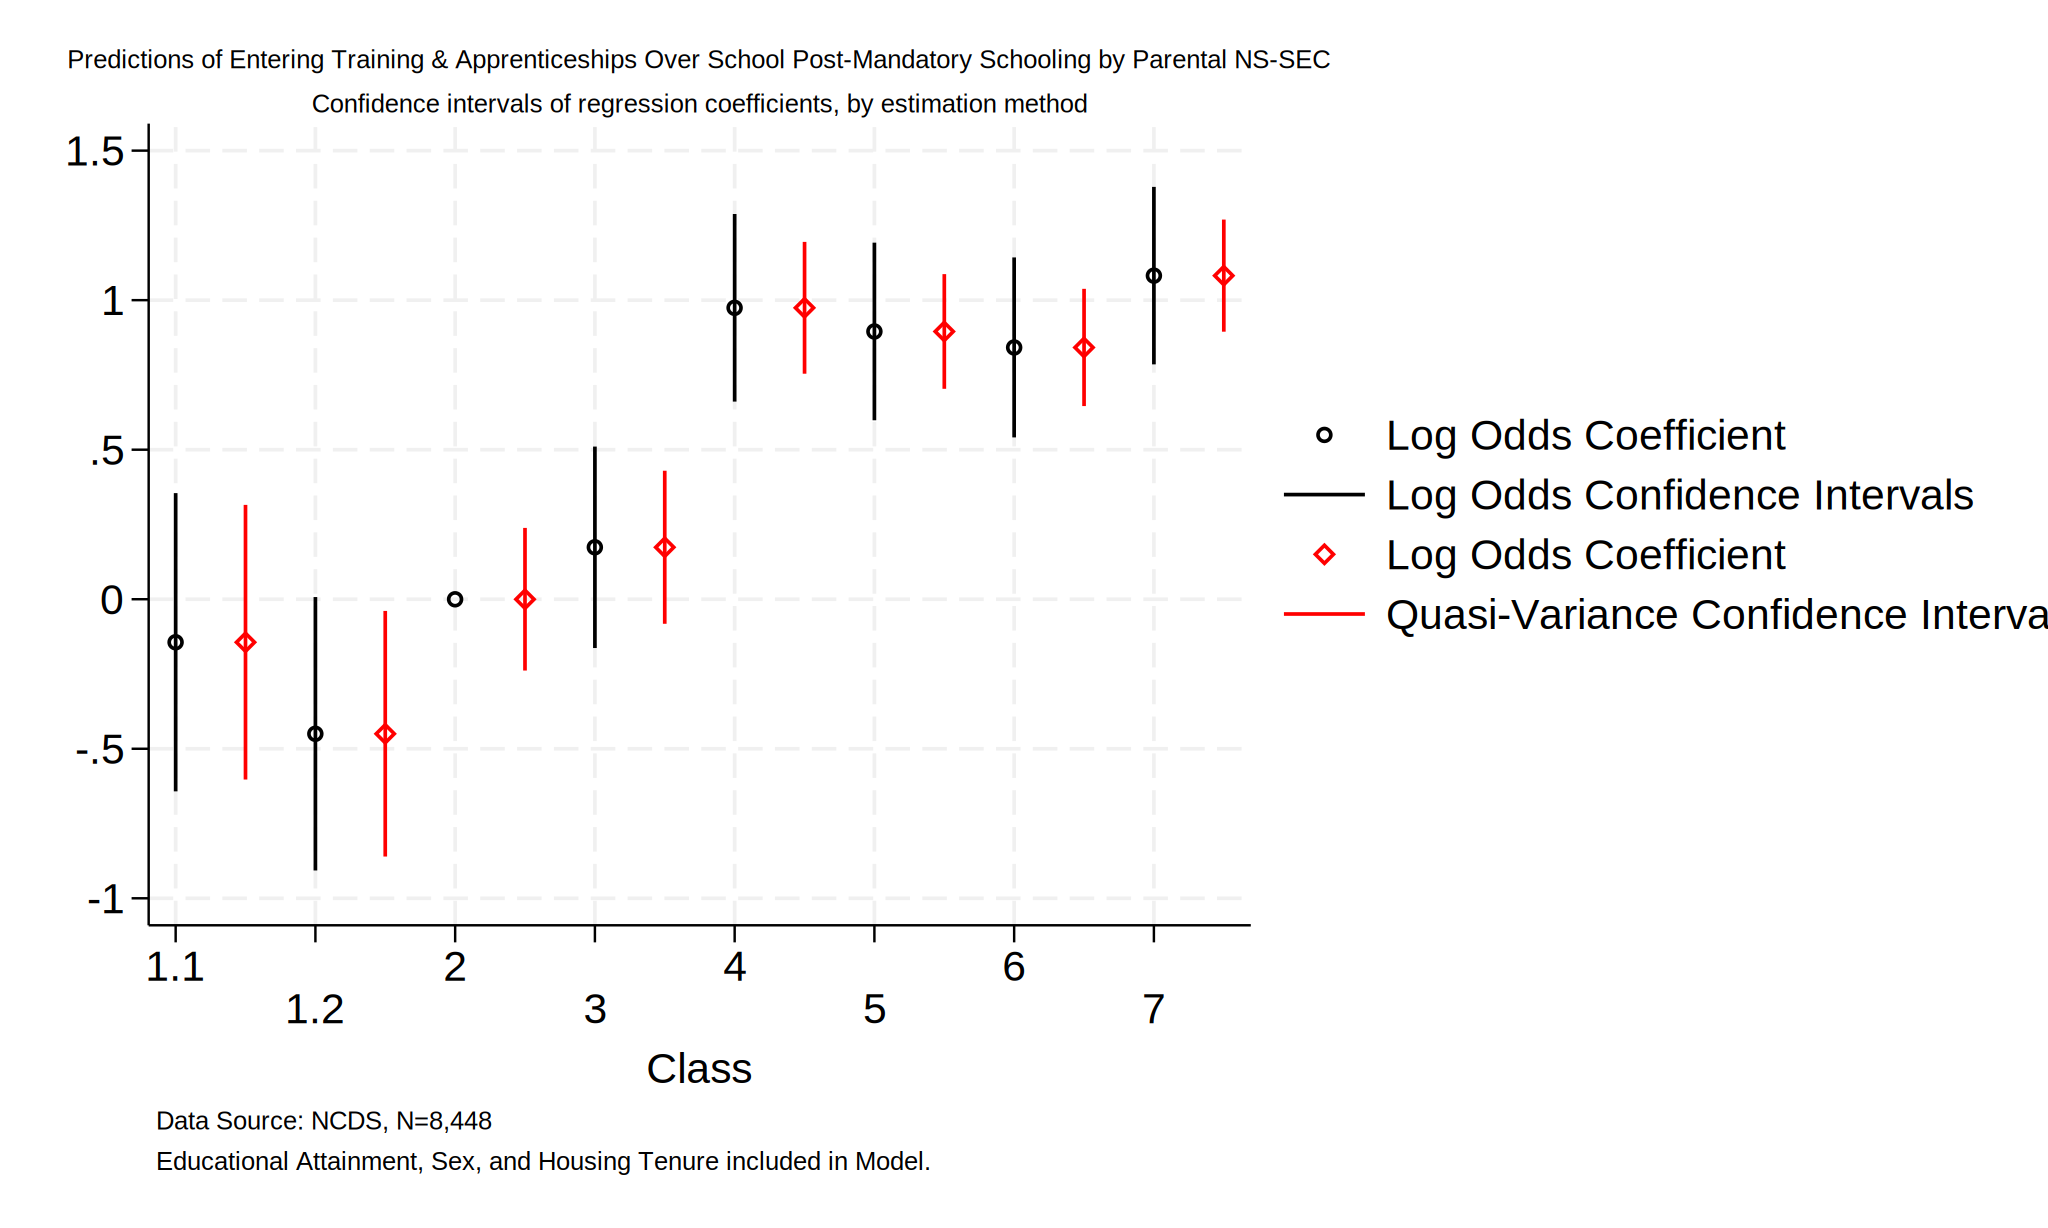

In [28]:
%%stata

graph twoway (scatter betathree groupingthree, symbol(Oh) mcolor(black) legend(label(1 "Log Odds Coefficient")) legend(label(2 "Log Odds Confidence Intervals"))) || rspike upperboundthree lowerboundthree groupingthree, lcolor(black) || (scatter bthree groupthree, msymbol(Dh) mcolor(red) legend(label(3 "Log Odds Coefficient")) legend(label(4 "Quasi-Variance Confidence Intervals"))) || rspike quasiupperthree quasilowerthree groupthree, lcolor(red) ///
title("Predictions of Entering Training & Apprenticeships Over School Post-Mandatory Schooling by Parental NS-SEC", size(vsmall) color(black)) ///
subtitle("Confidence intervals of regression coefficients, by estimation method", size(vsmall) color(black)) ///
note("Data Source: NCDS, N=8,448", size(vsmall) color(black)) ///
caption("Educational Attainment, Sex, and Housing Tenure included in Model.", size(vsmall) color(black)) ///
xla(1 3 5 7 9 11 13 15, valuelabel alternate )

graph save "quasigraphthree", replace


. 
. gen qvecon3=.
(8,448 missing values generated)

. replace qvecon3=3 if(econ201==3)
(2,570 real changes made)

. replace qvecon3=4 if(econ201==2)
(745 real changes made)

. replace qvecon3=2 if(econ201==1)
(3,225 real changes made)

. replace qvecon3=5 if(econ201==4)
(1,646 real changes made)

. replace qvecon3=1 if(econ201==5)
(262 real changes made)

. 
. label define qvecon3_lbl 5"Training & Apprenticeships" 2"Employment" 3"School
> " 4"Non-Traditional Education" 1"Unemployment & OLF"

. label values qvecon3 qvecon3_lbl

. 
. mlogit qvecon3 i.obin i.sex i.tenure i.qvnssec, b(3)

Iteration 0:  Log likelihood = -11575.292  
Iteration 1:  Log likelihood = -8810.6401  
Iteration 2:  Log likelihood = -8712.2775  
Iteration 3:  Log likelihood = -8708.5637  
Iteration 4:  Log likelihood = -8708.5423  
Iteration 5:  Log likelihood = -8708.5423  

Multinomial logistic regression                        Number of obs =   8,448
                                                       LR chi2

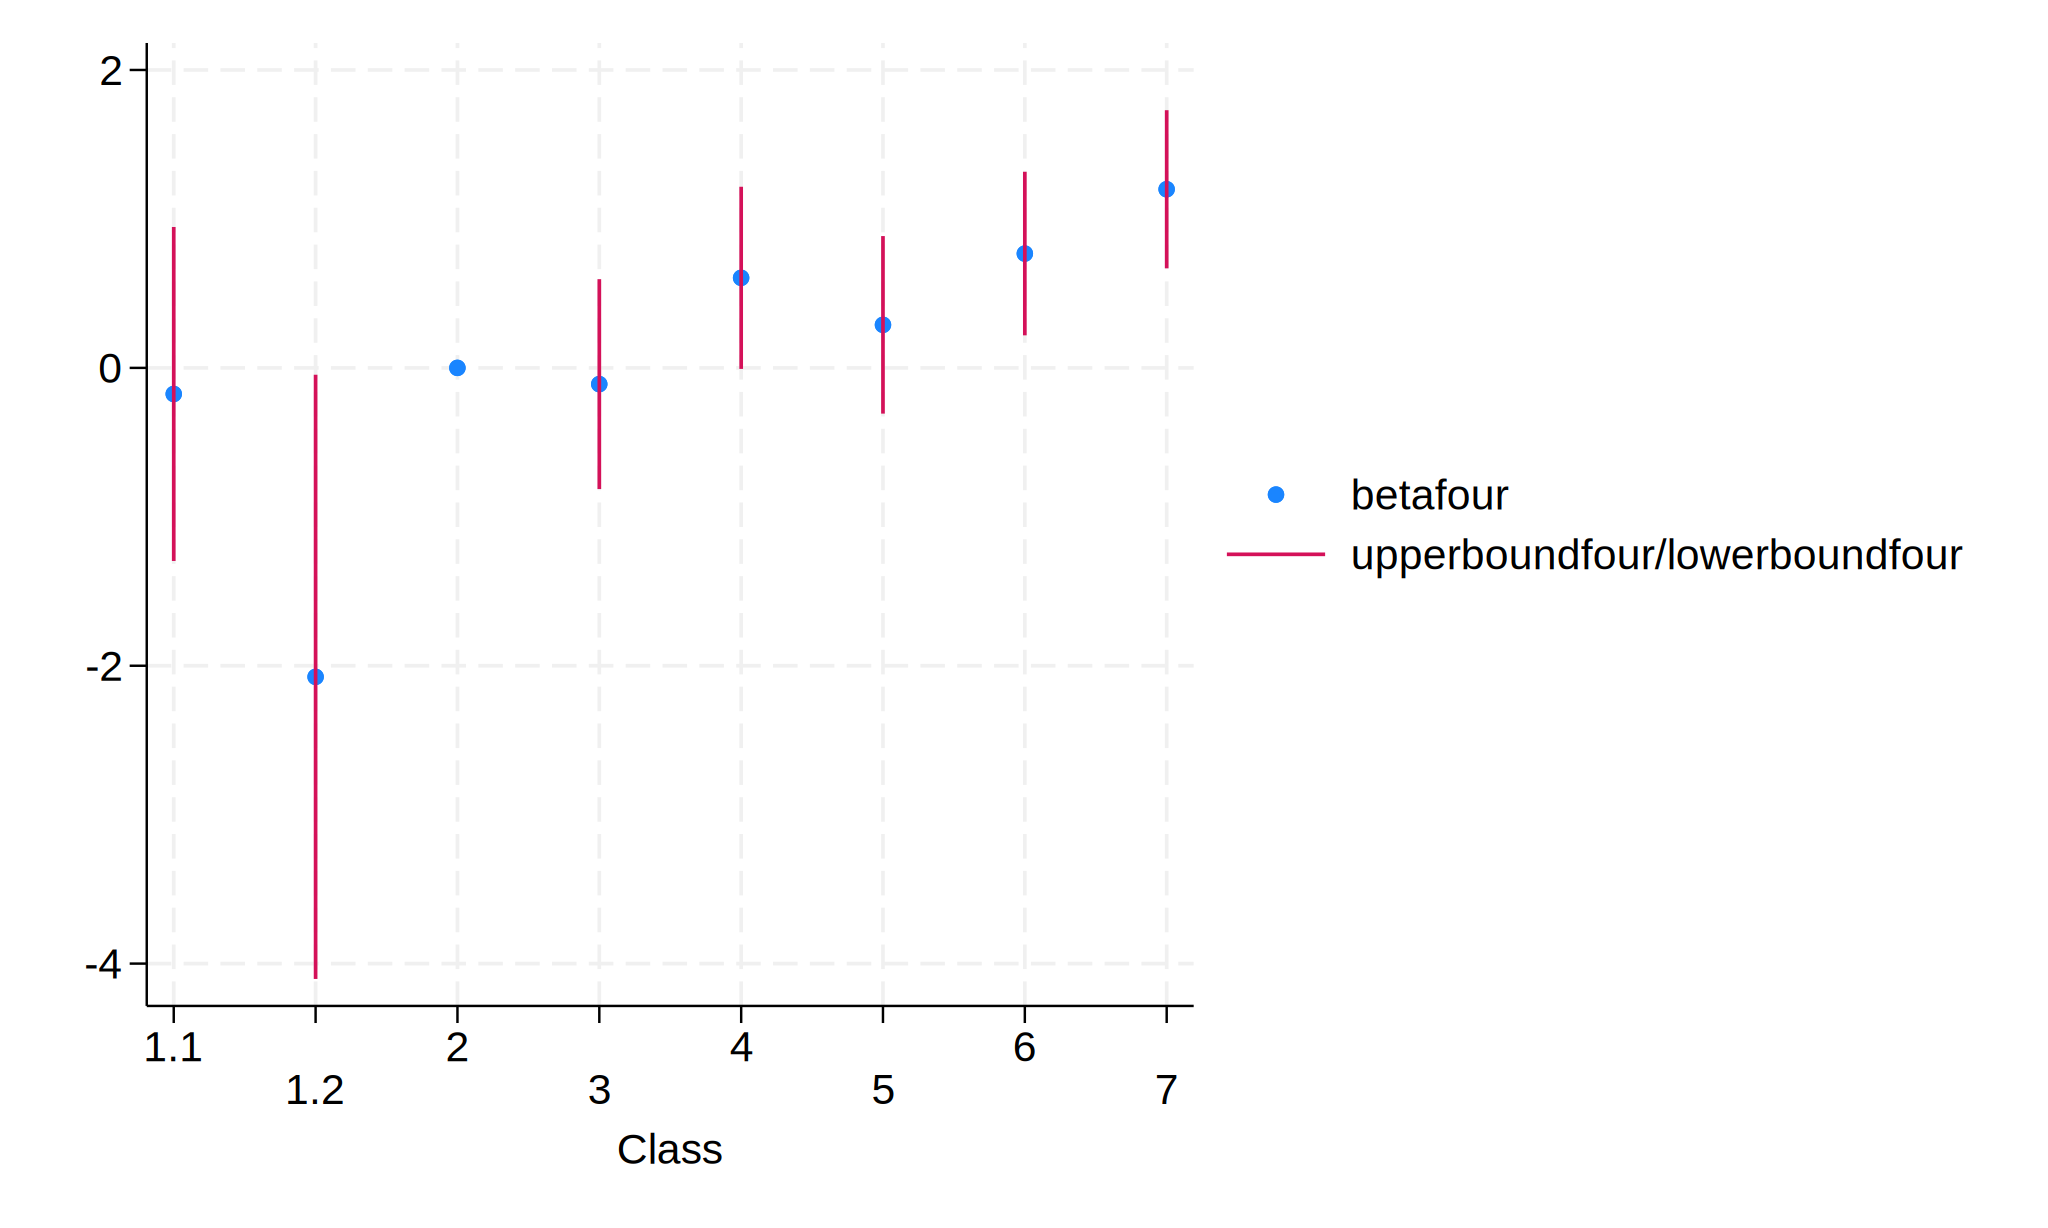

In [29]:
%%stata

gen qvecon3=.
replace qvecon3=3 if(econ201==3)
replace qvecon3=4 if(econ201==2)
replace qvecon3=2 if(econ201==1)
replace qvecon3=5 if(econ201==4)
replace qvecon3=1 if(econ201==5)

label define qvecon3_lbl 5"Training & Apprenticeships" 2"Employment" 3"School" 4"Non-Traditional Education" 1"Unemployment & OLF"
label values qvecon3 qvecon3_lbl

mlogit qvecon3 i.obin i.sex i.tenure i.qvnssec, b(3)

qv i.qvnssec

matrix define LBfour = e(qvlb)
matrix list LBfour

gen lbafour=LBfour[1,1] if _n==6
gen lbbfour=LBfour[2,1] if _n==2
gen lbcfour=LBfour[3,1] if _n==4
gen lbdfour=LBfour[4,1] if _n==8
gen lbefour=LBfour[5,1] if _n==10
gen lbffour=LBfour[6,1] if _n==12
gen lbgfour=LBfour[7,1] if _n==14
gen lbhfour=LBfour[8,1] if _n==16
egen quasilowerfour = rowtotal(lbafour lbbfour lbcfour lbdfour lbefour lbffour lbgfour lbhfour)
replace quasilowerfour=. if(quasilowerfour==0)

matrix define UBfour = e(qvub)
matrix list UBfour

gen ubafour=UBfour[1,1] if _n==6
gen ubbfour=UBfour[2,1] if _n==2
gen ubcfour=UBfour[3,1] if _n==4
gen ubdfour=UBfour[4,1] if _n==8
gen ubefour=UBfour[5,1] if _n==10
gen ubffour=UBfour[6,1] if _n==12
gen ubgfour=UBfour[7,1] if _n==14
gen ubhfour=UBfour[8,1] if _n==16
egen quasiupperfour = rowtotal(ubafour ubbfour ubcfour ubdfour ubefour ubffour ubgfour ubhfour)
replace quasiupperfour=. if(quasiupperfour==0)

gen bfour=(quasilowerfour+quasiupperfour)/2

gen groupfour=_n if _n==6
replace groupfour=_n if _n==2
replace groupfour=_n if _n==4
replace groupfour=_n if _n==8
replace groupfour=_n if _n==10
replace groupfour=_n if _n==12
replace groupfour=_n if _n==14
replace groupfour=_n if _n==16

label variable groupfour "Class"
label define regionfour 2 "1.1" 4 "1.2" 6 "2" 8 "3" 10 "4" 12 "5" 14 "6" 16 "7"
label value groupfour regionfour

graph twoway scatter bfour groupfour ///
|| rspike quasiupperfour quasilowerfour groupfour, vert   /// 
xlabel(2 4 6 8 10 12 14 16, valuelabel alternate )

mlogit qvecon3 i.obin i.sex i.tenure i.qvnssec, b(3)

matrix list e(b)
matrix list r(table)
matrix define Afour = r(table)
matrix define Afour = Afour["ll".."ul", 1...]
matrix list Afour

gen llafour=0 if _n==5
gen llbfour=Afour[1,8] if _n==1
gen llcfour=Afour[1,9] if _n==3
gen lldfour=Afour[1,10] if _n==7
gen llefour=Afour[1,11] if _n==9
gen llffour=Afour[1,12] if _n==11
gen llgfour=Afour[1,13] if _n==13
gen llhfour=Afour[1,14] if _n==15
egen lowerboundfour = rowtotal(llafour llbfour llcfour lldfour llefour llffour llgfour llhfour)

gen ulafour=0 if _n==5
gen ulbfour=Afour[2,8] if _n==1
gen ulcfour=Afour[2,9] if _n==3
gen uldfour=Afour[2,10] if _n==7
gen ulefour=Afour[2,11] if _n==9
gen ulffour=Afour[2,12] if _n==11
gen ulgfour=Afour[2,13] if _n==13
gen ulhfour=Afour[2,14] if _n==15
egen upperboundfour = rowtotal(ulafour ulbfour ulcfour uldfour ulefour ulffour ulgfour ulhfour)

gen betafour=(lowerboundfour+upperboundfour)/2

gen groupingfour=_n if _n==5
replace groupingfour=_n if _n==1
replace groupingfour=_n if _n==3
replace groupingfour=_n if _n==7
replace groupingfour=_n if _n==9
replace groupingfour=_n if _n==11
replace groupingfour=_n if _n==13
replace groupingfour=_n if _n==15
label variable groupingfour "Class"
label define regionsfour 1 "1.1" 3 "1.2" 5 "2" 7 "3" 9 "4" 11 "5" 13 "6" 15 "7"
label value groupingfour regionsfour

graph twoway scatter betafour groupingfour ///
|| rspike upperboundfour lowerboundfour groupingfour, vert   /// 
xlabel(1 3 5 7 9 11 13 15, valuelabel alternate )


. 
. graph twoway (scatter betafour groupingfour, symbol(Oh) mcolor(black) legend(
> label(1 "Log Odds Coefficient")) legend(label(2 "Log Odds Confidence Interval
> s"))) || rspike upperboundfour lowerboundfour groupingfour, lcolor(black) || 
> (scatter bfour groupfour, msymbol(Dh) mcolor(red) legend(label(3 "Log Odds Co
> efficient")) legend(label(4 "Quasi-Variance Confidence Intervals"))) || rspik
> e quasiupperfour quasilowerfour groupfour, lcolor(red) ///
> title("Predictions of Entering Unemployment & OLF Over School Post-Mandatory 
> Schooling by Parental NS-SEC", size(vsmall) color(black)) ///
> subtitle("Confidence intervals of regression coefficients, by estimation meth
> od", size(vsmall) color(black)) ///
> note("Data Source: NCDS, N=8,448", size(vsmall) color(black)) ///
> caption("Educational Attainment, Sex, and Housing Tenure included in Model.",
>  size(vsmall) color(black)) ///
> xla(1 3 5 7 9 11 13 15, valuelabel alternate )

. 
. graph save "quasigraphfour", replace

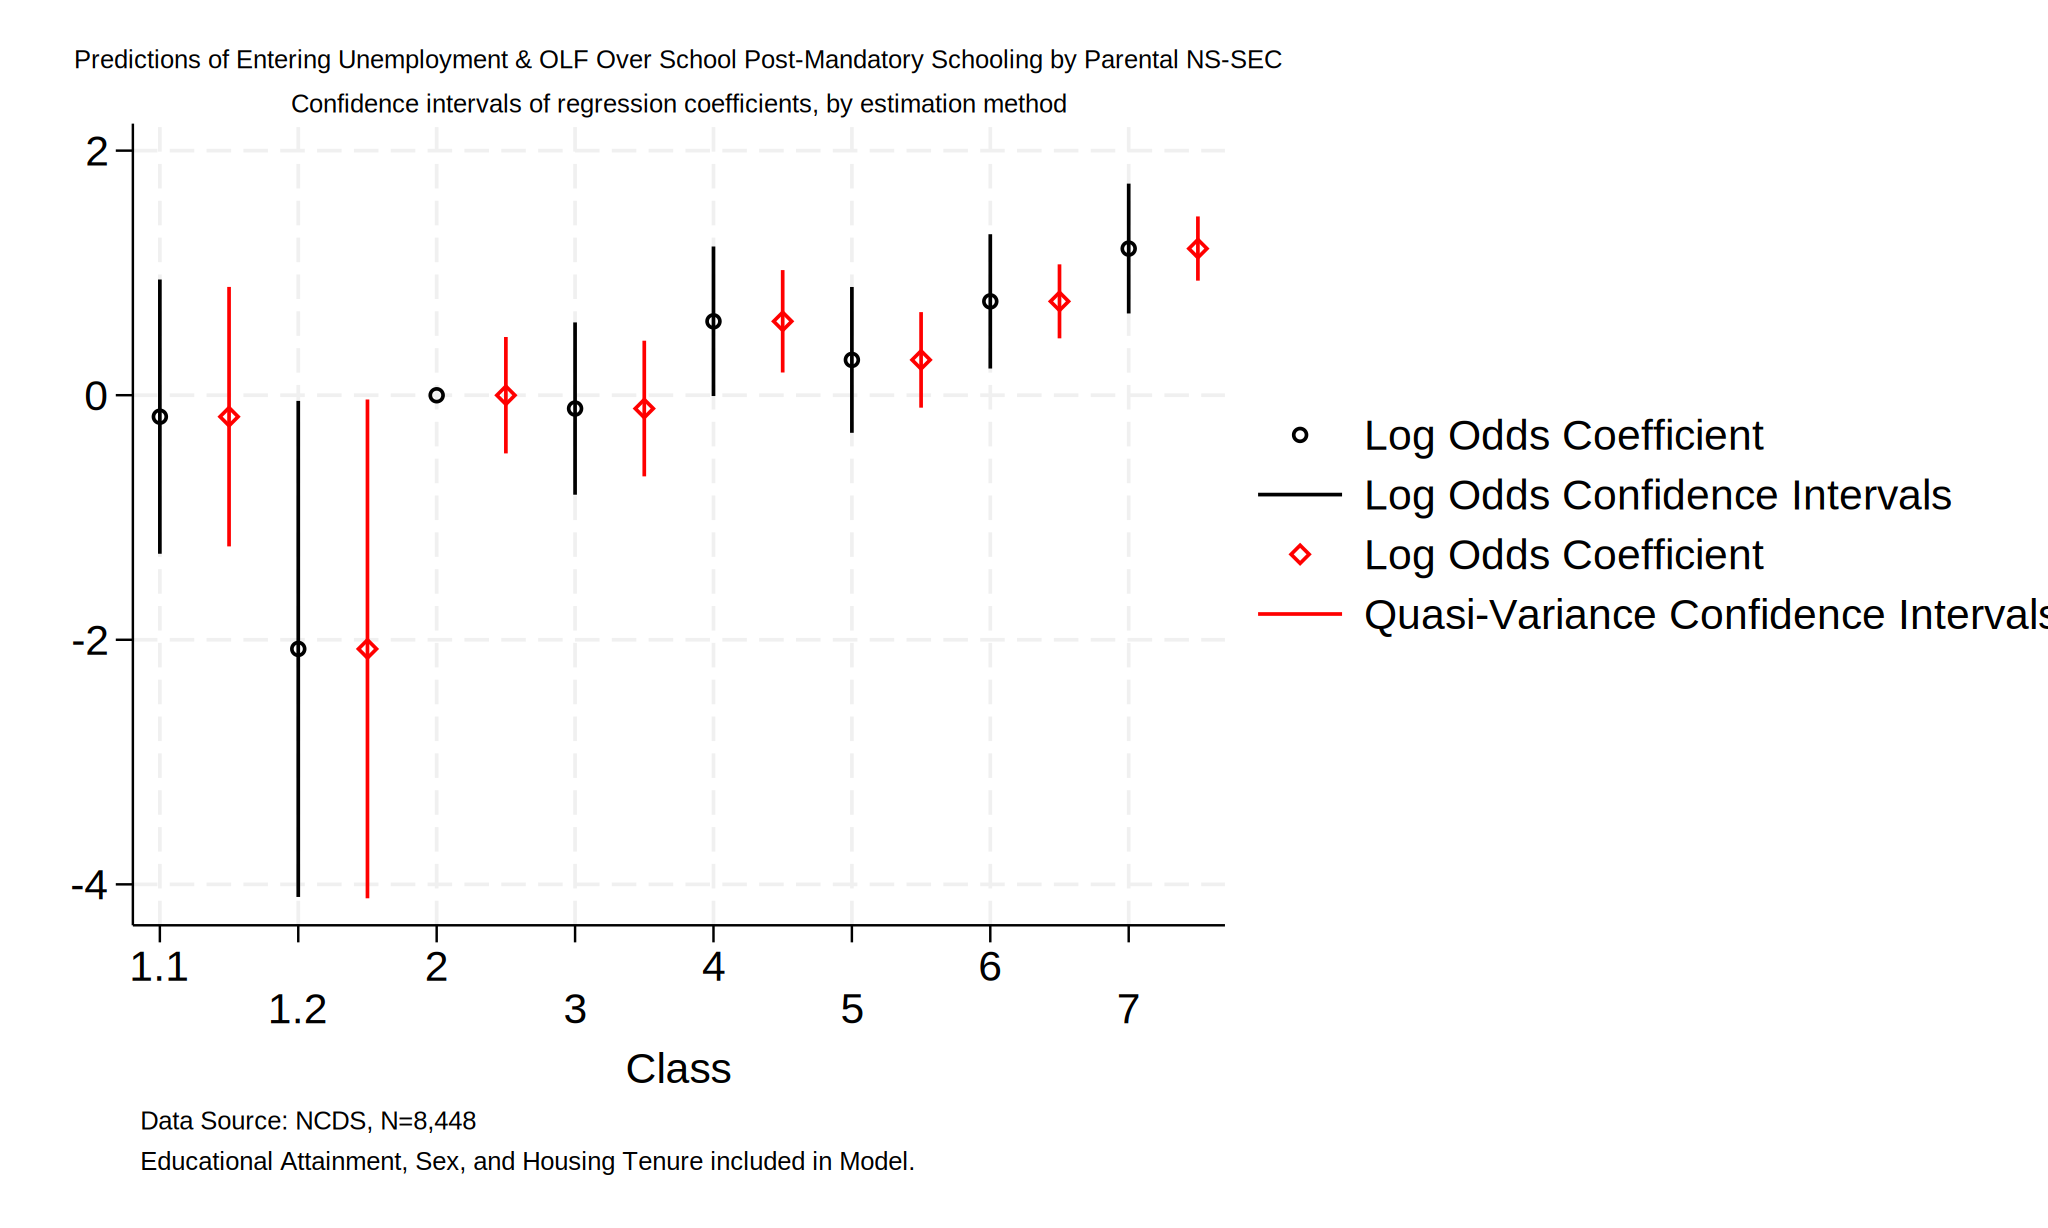

In [30]:
%%stata

graph twoway (scatter betafour groupingfour, symbol(Oh) mcolor(black) legend(label(1 "Log Odds Coefficient")) legend(label(2 "Log Odds Confidence Intervals"))) || rspike upperboundfour lowerboundfour groupingfour, lcolor(black) || (scatter bfour groupfour, msymbol(Dh) mcolor(red) legend(label(3 "Log Odds Coefficient")) legend(label(4 "Quasi-Variance Confidence Intervals"))) || rspike quasiupperfour quasilowerfour groupfour, lcolor(red) ///
title("Predictions of Entering Unemployment & OLF Over School Post-Mandatory Schooling by Parental NS-SEC", size(vsmall) color(black)) ///
subtitle("Confidence intervals of regression coefficients, by estimation method", size(vsmall) color(black)) ///
note("Data Source: NCDS, N=8,448", size(vsmall) color(black)) ///
caption("Educational Attainment, Sex, and Housing Tenure included in Model.", size(vsmall) color(black)) ///
xla(1 3 5 7 9 11 13 15, valuelabel alternate )

graph save "quasigraphfour", replace

### Marginal Effects Graphs

A key issue with mlogit interpretation is that you have a choice of interpreting log odds, or odds ratios. Both have their downsides. Average Marginal Effects are a much more attractive option - especially because you can graph them visually. The following code will create the average marginal effects for NS-SEC, Sex, Educational Attainment, and Housing Tenure. Saving them to the local disk. The graph scheme is also set so it is consistent across formats. 


. 
. mlogit econ201 i.obin i.sex i.tenure ib(3).nssec, b(3)

Iteration 0:  Log likelihood = -11575.292  
Iteration 1:  Log likelihood = -8810.6401  
Iteration 2:  Log likelihood = -8712.2775  
Iteration 3:  Log likelihood = -8708.5637  
Iteration 4:  Log likelihood = -8708.5423  
Iteration 5:  Log likelihood = -8708.5423  

Multinomial logistic regression                        Number of obs =   8,448
                                                       LR chi2(40)   = 5733.50
                                                       Prob > chi2   =  0.0000
Log likelihood = -8708.5423                            Pseudo R2     =  0.2477

------------------------------------------------------------------------------
     econ201 | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
Employment   |
        obin |
>5 O-Levels  |  -3.585632   .0828947   -43.26   0.000    -3.748102   -3.423161
          

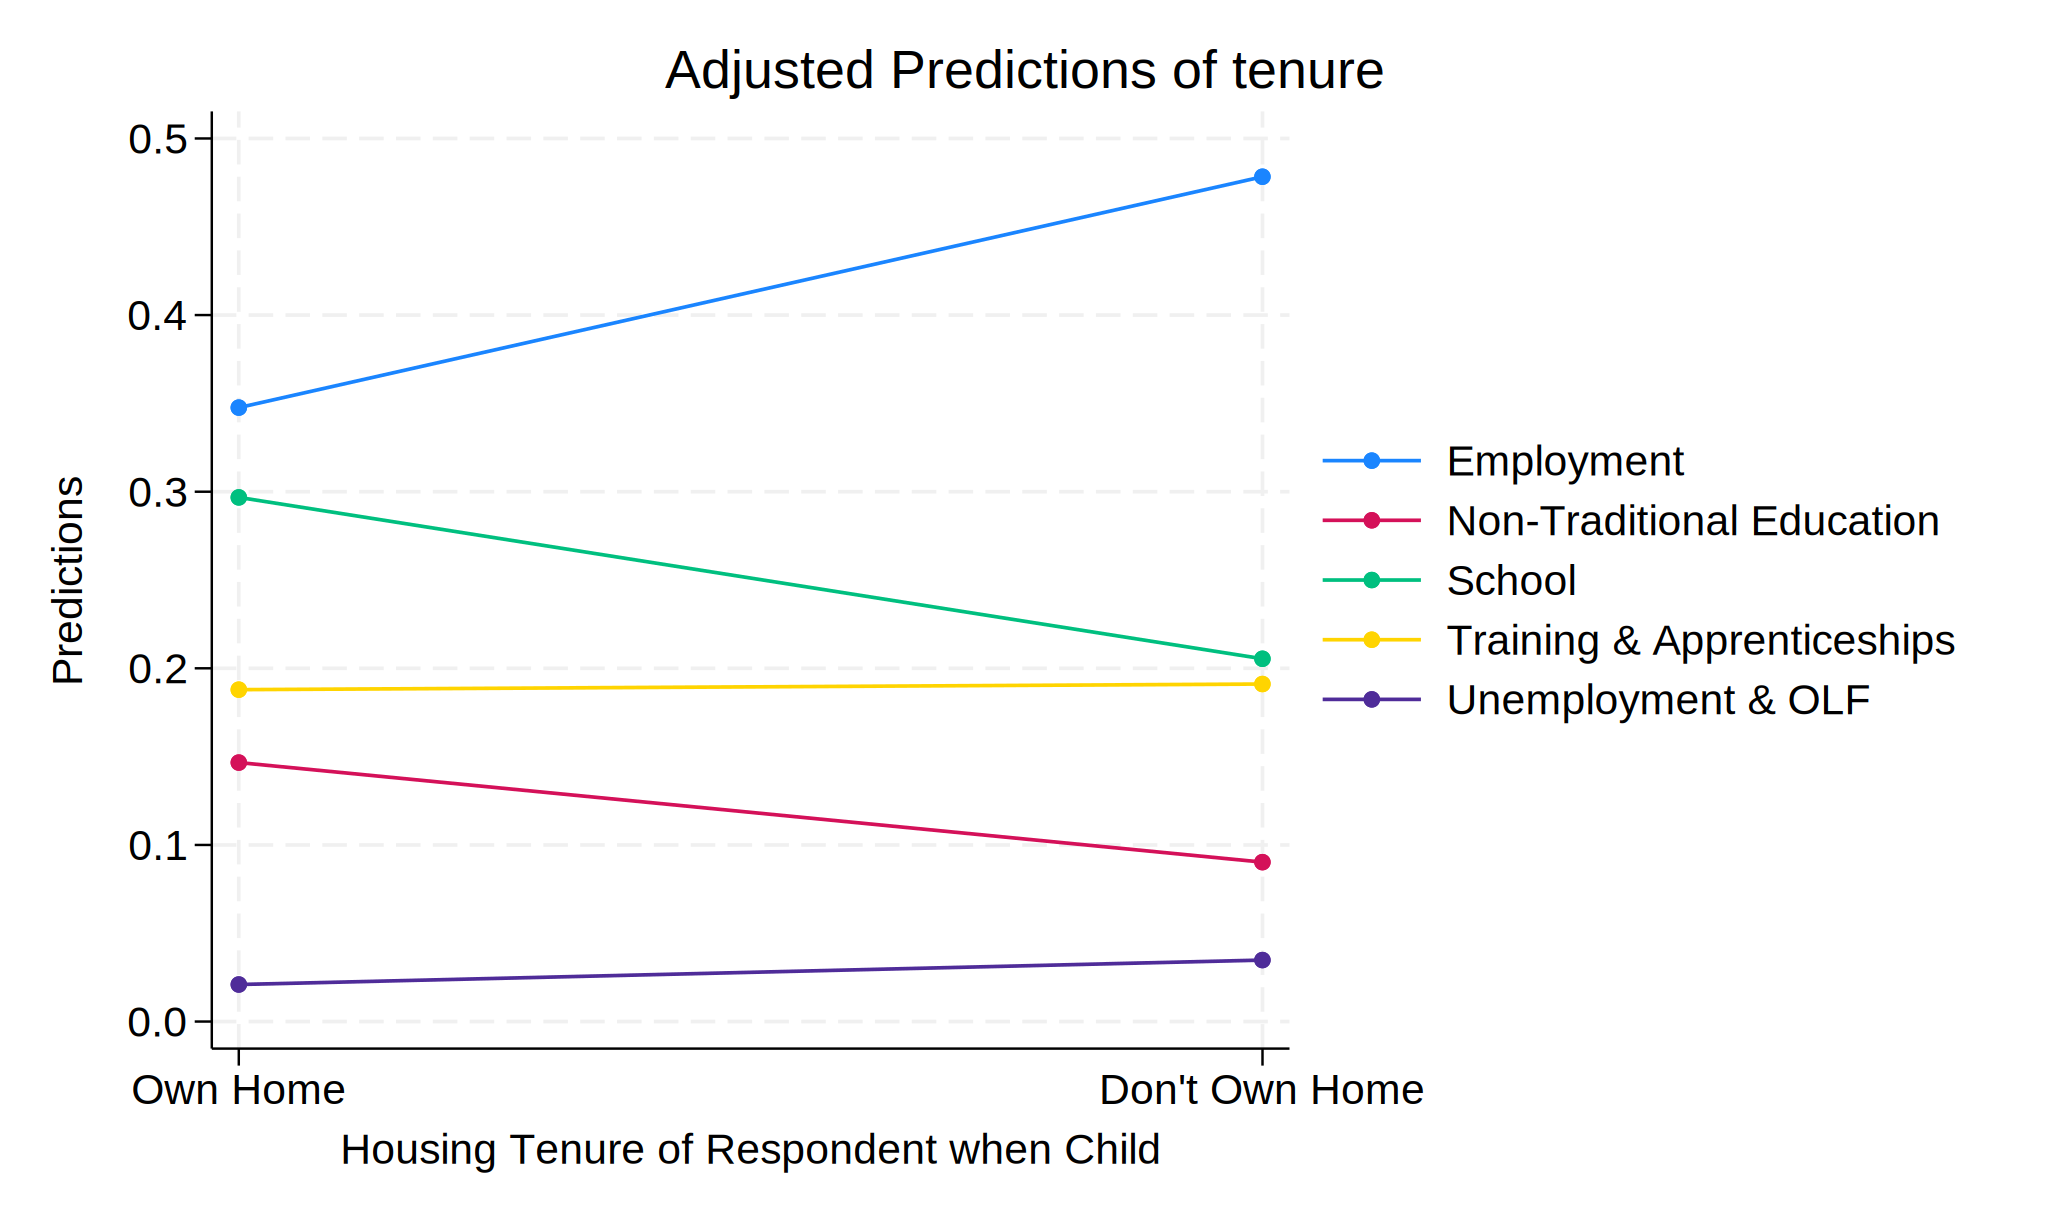

In [31]:
%%stata

mlogit econ201 i.obin i.sex i.tenure ib(3).nssec, b(3)

margins nssec, atmeans predict(outcome(1)) saving(file1, replace)
margins nssec, atmeans predict(outcome(2)) saving(file2, replace)
margins nssec, atmeans predict(outcome(3)) saving(file3, replace)
margins nssec, atmeans predict(outcome(4)) saving(file4, replace)
margins nssec, atmeans predict(outcome(5)) saving(file5, replace)

combomarginsplot file1 file2 file3 file4 file5, labels("Employment" "Non-Traditional Education" "School" "Training & Apprenticeships" "Unemployment & OLF") noci

margins obin, atmeans predict(outcome(1)) saving(file6, replace)
margins obin, atmeans predict(outcome(2)) saving(file7, replace)
margins obin, atmeans predict(outcome(3)) saving(file8, replace)
margins obin, atmeans predict(outcome(4)) saving(file9, replace)
margins obin, atmeans predict(outcome(5)) saving(file10, replace)


combomarginsplot file6 file7 file8 file9 file10, labels("Employment" "Non-Traditional Education" "School" "Training & Apprenticeships" "Unemployment & OLF") noci

margins sex, atmeans predict(outcome(1)) saving(file11, replace)
margins sex, atmeans predict(outcome(2)) saving(file12, replace)
margins sex, atmeans predict(outcome(3)) saving(file13, replace)
margins sex, atmeans predict(outcome(4)) saving(file14, replace)
margins sex, atmeans predict(outcome(5)) saving(file15, replace)


combomarginsplot file11 file12 file13 file14 file15, labels("Employment" "Non-Traditional Education" "School" "Training & Apprenticeships" "Unemployment & OLF") noci

margins tenure, atmeans predict(outcome(1)) saving(file16, replace)
margins tenure, atmeans predict(outcome(2)) saving(file17, replace)
margins tenure, atmeans predict(outcome(3)) saving(file18, replace)
margins tenure, atmeans predict(outcome(4)) saving(file19, replace)
margins tenure, atmeans predict(outcome(5)) saving(file20, replace)


combomarginsplot file16 file17 file18 file19 file20, labels("Employment" "Non-Traditional Education" "School" "Training & Apprenticeships" "Unemployment & OLF") noci


As was done with the NS-SEC CCA model, the average marginal effect statistics will be saved and stored for later combination. 

In [32]:
%%stata

quietly mlogit econ201 i.obin i.sex i.tenure ib(3).nssec, b(3)

margins, dydx(*) post

est store nssecccamarg

etable, append


. 
. quietly mlogit econ201 i.obin i.sex i.tenure ib(3).nssec, b(3)

. 
. margins, dydx(*) post

Average marginal effects                                 Number of obs = 8,448
Model VCE: OIM

dy/dx wrt: 1.obin 1.sex 1.tenure 1.nssec 2.nssec 4.nssec 5.nssec 6.nssec
           7.nssec 8.nssec

1._predict: Pr(econ201==Employment), predict(pr outcome(1))
2._predict: Pr(econ201==Post_Schooling_Education), predict(pr outcome(2))
3._predict: Pr(econ201==School), predict(pr outcome(3))
4._predict: Pr(econ201==Training_Apprenticeships), predict(pr outcome(4))
5._predict: Pr(econ201==Unemployment_and_OLF), predict(pr outcome(5))

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
0.obin       |  (base outcome)
-------------+--------------------------------------------------

Finally to overcome the reference category problem that mlogit models + categorical variables present, quasi-variance statistics are produced. Unfortunately the Stata command 'qv' - the only command that produces QV statistics in Stata does not work with the mlogit command. Thus the QV statistics will need to be calculated away from stata thus breaking the workflow. Stata does provide the relevant statistics needed to calculate the QV statistics using the vce command however. This will be used. 

In [33]:
%%stata

quietly mlogit econ201 i.obin i.sex i.tenure ib(3).nssec, b(3)

vce


. 
. quietly mlogit econ201 i.obin i.sex i.tenure ib(3).nssec, b(3)

. 
. vce

Covariance matrix of coefficients of mlogit model

             | Employment                                                 
             |          1.          1.          1.          1.          2.
        e(V) |       obin         sex      tenure       nssec       nssec 
-------------+------------------------------------------------------------
Employment   |                                                            
      1.obin |  .00687154                                                 
       1.sex |  .00036356   .00558184                                     
    1.tenure |  .00011935   .00010198   .00585222                         
     1.nssec | -.00016885  -.00041955   .00053208   .05056734             
     2.nssec |   .0000321  -.00025226   .00035458   .01049215   .04807467 
     4.nssec |  -.0000804  -.00017294  -.00047683   .01040227    .0104136 
     5.nssec | -.00022399  -.00021808   -.00

As done earlier, the model fit for both RGSC and CAMSIS will be looked at through the deviance, change in deviance, d.f, and R2. Most of this has already been done earlier but some additional fitstats are required. 

In [34]:
%%stata

quietly mlogit econ201 camsisf, b(3)

fitstat
estat ic

quietly mlogit econ201 i.obin i.sex i.tenure camsisf, b(3) 

fitstat
estat ic


. 
. quietly mlogit econ201 camsisf, b(3)

. 
. fitstat

Measures of Fit for mlogit of econ201

Log-Lik Intercept Only:   -11575.292     Log-Lik Full Model:       -11149.928
D(8438):                   22299.855     LR(4):                       850.730
                                         Prob > LR:                     0.000
McFadden's R2:                 0.037     McFadden's Adj R2:             0.036
Maximum Likelihood R2:         0.096     Cragg & Uhler's R2:            0.102
Count R2:                      0.382     Adj Count R2:                  0.000
AIC:                           2.642     AIC*n:                     22319.855
BIC:                      -53993.883     BIC':                       -814.563

. estat ic

Akaike's information criterion and Bayesian information criterion

-----------------------------------------------------------------------------
       Model |          N   ll(null)  ll(model)      df        AIC        BIC
-------------+-----------------------------

Moving on to the sensitivity analysis now, the second model to look at is CAMSIS. The same procedures conducted for NS-SEC will now be repeated. 

In [35]:
%%stata

mlogit econ201 i.obin i.sex i.tenure camsisf, b(3)

est store camsiscca

etable, append

fitstat


. 
. mlogit econ201 i.obin i.sex i.tenure camsisf, b(3)

Iteration 0:  Log likelihood = -11575.292  
Iteration 1:  Log likelihood = -8867.6087  
Iteration 2:  Log likelihood = -8774.5303  
Iteration 3:  Log likelihood =  -8771.873  
Iteration 4:  Log likelihood = -8771.8699  
Iteration 5:  Log likelihood = -8771.8699  

Multinomial logistic regression                        Number of obs =   8,448
                                                       LR chi2(16)   = 5606.85
                                                       Prob > chi2   =  0.0000
Log likelihood = -8771.8699                            Pseudo R2     =  0.2422

------------------------------------------------------------------------------
     econ201 | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
Employment   |
        obin |
>5 O-Levels  |  -3.630427   .0823112   -44.11   0.000    -3.791754     -3.4691
             |

Marginal Effects tables will now be produced for CAMSIS. 

In [36]:
%%stata

quietly mlogit econ201 i.obin i.sex i.tenure camsisf, b(3)

margins, dydx(*) post

est store camsisccamarg

etable, append


. 
. quietly mlogit econ201 i.obin i.sex i.tenure camsisf, b(3)

. 
. margins, dydx(*) post

Average marginal effects                                 Number of obs = 8,448
Model VCE: OIM

dy/dx wrt: 1.obin 1.sex 1.tenure camsisf

1._predict: Pr(econ201==Employment), predict(pr outcome(1))
2._predict: Pr(econ201==Post_Schooling_Education), predict(pr outcome(2))
3._predict: Pr(econ201==School), predict(pr outcome(3))
4._predict: Pr(econ201==Training_Apprenticeships), predict(pr outcome(4))
5._predict: Pr(econ201==Unemployment_and_OLF), predict(pr outcome(5))

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
0.obin       |  (base outcome)
-------------+----------------------------------------------------------------
1.obin       |
    _predict |
          1  |  -.

Now onto the RGSC model, whereby deviance statistics, goodness-of-fit statistics, model, and marginal effects will be re-created. 

In [37]:
%%stata

quietly mlogit econ201 ib(2).rgsc, b(3)

fitstat
estat ic

quietly mlogit econ201 i.obin i.sex i.tenure ib(2).rgsc, b(3) 

fitstat
estat ic

mlogit econ201 i.obin i.sex i.tenure ib(2).rgsc, b(3)

est store rgsccca

etable, append

fitstat


. 
. quietly mlogit econ201 ib(2).rgsc, b(3)

. 
. fitstat

Measures of Fit for mlogit of econ201

Log-Lik Intercept Only:   -11575.292     Log-Lik Full Model:       -11010.107
D(8413):                   22020.214     LR(20):                     1130.371
                                         Prob > LR:                     0.000
McFadden's R2:                 0.049     McFadden's Adj R2:             0.046
Maximum Likelihood R2:         0.125     Cragg & Uhler's R2:            0.134
Count R2:                      0.382     Adj Count R2:                  0.000
AIC:                           2.615     AIC*n:                     22090.214
BIC:                      -54047.482     BIC':                       -949.538

. estat ic

Akaike's information criterion and Bayesian information criterion

-----------------------------------------------------------------------------
       Model |          N   ll(null)  ll(model)      df        AIC        BIC
-------------+--------------------------

In [38]:
%%stata

quietly mlogit econ201 i.obin i.sex i.tenure ib(2).rgsc, b(3)

margins, dydx(*) post

est store rgscccamarg

etable, append


. 
. quietly mlogit econ201 i.obin i.sex i.tenure ib(2).rgsc, b(3)

. 
. margins, dydx(*) post

Average marginal effects                                 Number of obs = 8,448
Model VCE: OIM

dy/dx wrt: 1.obin 1.sex 1.tenure 1.rgsc 3.rgsc 4.rgsc 5.rgsc 6.rgsc

1._predict: Pr(econ201==Employment), predict(pr outcome(1))
2._predict: Pr(econ201==Post_Schooling_Education), predict(pr outcome(2))
3._predict: Pr(econ201==School), predict(pr outcome(3))
4._predict: Pr(econ201==Training_Apprenticeships), predict(pr outcome(4))
5._predict: Pr(econ201==Unemployment_and_OLF), predict(pr outcome(5))

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
0.obin       |  (base outcome)
-------------+----------------------------------------------------------------
1.obin       |
   

The sensitivity analysis portion of analysis is now complete - from this it is concluded that the NS-SEC model is best going forward. This means that further analysis will continue will this model and this model alone. All that is left to do is to export the tables into word and save the dataset under a new name. 

In [39]:
%%stata

est table nsseccca camsiscca rgsccca

collect style showbase all

collect label levels etable_depvar 1 "NS-SEC Model" ///
										2 "CAMSIS Model" ///
										3 "RGSC Model", modify

collect style cell, font(Times New Roman)

etable, replay column(depvar) ///
cstat(_r_b, nformat(%4.2f))  ///
		cstat(_r_se, nformat(%6.2f))  ///
		showstars showstarsnote  ///
		stars(.05 "*" .01 "**" .001 "***", attach(_r_b)) ///
		mstat(N) mstat(aic) mstat(bic) mstat(r2_a)	///
		title("Table 2: Regression Models") ///
		titlestyles(font(Arial Narrow, size(14) bold)) ///
		note("Data Source: NCDS") ///
		notestyles(font(Arial Narrow, size(10) italic)) ///
		export("regressionchapterone.docx", replace)  

save ncds4_cca, replace



. 
. est table nsseccca camsiscca rgsccca

-----------------------------------------------------
    Variable |  nsseccca    camsiscca     rgsccca    
-------------+---------------------------------------
Employment   |
        obin |
          1  | -3.5856316    -3.630427   -3.6034915  
             |
         sex |
          1  | -.39627955   -.40313923   -.39669517  
             |
      tenure |
          1  |  .68707514    .79193408    .71247662  
             |
       nssec |
          1  | -.00667135                            
          2  | -.66768357                            
             |
       nssec |
          4  |  .34657544                            
          5  |  .95604497                            
          6  |  .86482475                            
          7  |  .90946601                            
          8  |  1.3630321                            
             |
     camsisf |              -.03106519               
             |
        rgsc |
     

Part Four: Handling Missing Data

Firstly, there is a need to use the earlier saved dataset with just the recoded and cleaned variables - without any models. 

In [40]:
%%stata

use "G:\Stata data and do\Tables and Figures\Tables and Figuers for Chapter One\ncds4_recoded"


. 
. use "G:\Stata data and do\Tables and Figures\Tables and Figuers for Chapter O
> ne\ncds4_recoded"

. 


Prior to any kind of imputation or handling missing data, the first thing that needs to be done is to remove any cases that are confirmed to be dead or attritioned out of the dataset. Fortunately, the NCDS has a variable that establishes just this - a tracing and contact variable. After dropping these cases, a table of missing patterns is produced to see the level of missingness. 

In [41]:
%%stata

drop if missing(n4118)

misstable summarize econ201 obin sex tenure nssec 

misstable patterns econ201 obin sex tenure nssec


. 
. drop if missing(n4118)
(6,022 observations deleted)

. 
. misstable summarize econ201 obin sex tenure nssec 
                                                               Obs<.
                                                +------------------------------
               |                                | Unique
      Variable |     Obs=.     Obs>.     Obs<.  | values        Min         Max
  -------------+--------------------------------+------------------------------
       econ201 |        86              12,450  |      5          1           5
          obin |        26              12,510  |      2          0           1
        tenure |     1,893              10,643  |      2          0           1
         nssec |     3,779               8,757  |      8          1           8
  -----------------------------------------------------------------------------

. 
. misstable patterns econ201 obin sex tenure nssec

   Missing-value patterns
     (1 means complete)

            

Following on from this, for each variable a deeper look into the levels of missingness by frequency, mean, and standard deviation are provided. 

In [42]:
%%stata

quietly mlogit econ201 i.obin i.sex i.tenure ib(3).nssec, b(3)  

gen cc= e(sample)

foreach var in econ201 obin sex tenure nssec {
	tab `var' cc, col
}


. 
. quietly mlogit econ201 i.obin i.sex i.tenure ib(3).nssec, b(3)  

. 
. gen cc= e(sample)

. 
. foreach var in econ201 obin sex tenure nssec {
  2.         tab `var' cc, col
  3. }

+-------------------+
| Key               |
|-------------------|
|     frequency     |
| column percentage |
+-------------------+

 Economic Activity of |
        Respondent on |
  September when they |          cc
               are 16 |         0          1 |     Total
----------------------+----------------------+----------
           Employment |     1,674      3,225 |     4,899 
                      |     41.83      38.17 |     39.35 
----------------------+----------------------+----------
Post-Schooling Educat |       312        745 |     1,057 
                      |      7.80       8.82 |      8.49 
----------------------+----------------------+----------
               School |     1,147      2,570 |     3,717 
                      |     28.66      30.42 |     29.86 
--------------------

It seems that missingness may be an issue with this data. Multiple Imputation is one way of solving an issue of missingness. To Impute data however there is a need for some auxillary variables to be included.

In [43]:
%%stata

tab n0region

gen acatnn0region = n0region
replace acatnn0region=. if (acatnn0region==-2)
replace acatnn0region=0 if (acatnn0region==1)
replace acatnn0region=1 if (acatnn0region==2)
replace acatnn0region=1 if (acatnn0region==3)
replace acatnn0region=1 if (acatnn0region==4)
replace acatnn0region=1 if (acatnn0region==5)
replace acatnn0region=1 if (acatnn0region==6)
replace acatnn0region=1 if (acatnn0region==7)
replace acatnn0region=1 if (acatnn0region==8)
replace acatnn0region=1 if (acatnn0region==9)
replace acatnn0region=1 if (acatnn0region==10)
replace acatnn0region=1 if (acatnn0region==11)

tab acatnn0region 

tab n99

gen bconnn99 = n99
replace bconnn99=. if (bconnn99==-1)
replace bconnn99=0 if (bconnn99==1)
replace bconnn99=1 if (bconnn99==2)
replace bconnn99=1 if (bconnn99==3)
replace bconnn99=1 if (bconnn99==4)
replace bconnn99=1 if (bconnn99==5)
replace bconnn99=1 if (bconnn99==6)
replace bconnn99=1 if (bconnn99==7)
replace bconnn99=1 if (bconnn99==8)
replace bconnn99=1 if (bconnn99==9)
replace bconnn99=1 if (bconnn99==10)
replace bconnn99=1 if (bconnn99==11)
replace bconnn99=1 if (bconnn99==12)
replace bconnn99=1 if (bconnn99==13)
replace bconnn99=1 if (bconnn99==14)

tab bconnn99

tab n197

gen maw5 = n197
replace maw5=. if (maw5==-1)
replace maw5=0 if (maw5==1)
replace maw5=1 if (maw5==2)
replace maw5=1 if (maw5==3)
replace maw5=1 if (maw5==4)

tab maw5

tab n512

gen aconnn512 = n512
replace aconnn512=. if (aconnn512==-1)
replace aconnn512=0 if (aconnn512==1)
replace aconnn512=1 if (aconnn512==2)
replace aconnn512=1 if (aconnn512==3)
replace aconnn512=1 if (aconnn512==4)
replace aconnn512=1 if (aconnn512==5)
replace aconnn512=1 if (aconnn512==6)

tab aconnn512

tab n236

gen acatnn236 = n236
replace acatnn236=. if (n236==-1)

tab acatnn236

tab n95

gen bcatnn95 = n95
replace bcatnn95=. if (bcatnn95==-1)
replace bcatnn95=0 if (bcatnn95==1)
replace bcatnn95=0 if (bcatnn95==2)
replace bcatnn95=0 if (bcatnn95==3)
replace bcatnn95=0 if (bcatnn95==4)
replace bcatnn95=1 if (bcatnn95==5)
replace bcatnn95=1 if (bcatnn95==6)
replace bcatnn95=1 if (bcatnn95==7)
replace bcatnn95=1 if (bcatnn95==8)
replace bcatnn95=1 if (bcatnn95==9)
replace bcatnn95=1 if (bcatnn95==10)
replace bcatnn95=1 if (bcatnn95==11)
replace bcatnn95=1 if (bcatnn95==12)
replace bcatnn95=1 if (bcatnn95==13)
replace bcatnn95=1 if (bcatnn95==14)
replace bcatnn95=1 if (bcatnn95==15)
replace bcatnn95=1 if (bcatnn95==16)
replace bcatnn95=1 if (bcatnn95==17)
replace bcatnn95=1 if (bcatnn95==18)
replace bcatnn95=1 if (bcatnn95==19)
replace bcatnn95=1 if (bcatnn95==20)
replace bcatnn95=1 if (bcatnn95==21)
replace bcatnn95=1 if (bcatnn95==22)

tab bcatnn95

tab n180

gen DadNeverReads = n180
replace DadNeverReads=. if (DadNeverReads==-1)
replace DadNeverReads=0 if (DadNeverReads==1)
replace DadNeverReads=1 if (DadNeverReads==2)
replace DadNeverReads=1 if (DadNeverReads==3)
replace DadNeverReads=1 if (DadNeverReads==4)

tab DadNeverReads

tab n1434

gen ccatnn1434 = n1434
replace ccatnn1434=. if (ccatnn1434==-1)
replace ccatnn1434=0 if (ccatnn1434==1)
replace ccatnn1434=1 if (ccatnn1434==2)
replace ccatnn1434=1 if (ccatnn1434==3)
replace ccatnn1434=1 if (ccatnn1434==4)
replace ccatnn1434=1 if (ccatnn1434==5)
replace ccatnn1434=1 if (ccatnn1434==6)
replace ccatnn1434=1 if (ccatnn1434==7)
replace ccatnn1434=1 if (ccatnn1434==8)
replace ccatnn1434=1 if (ccatnn1434==9)

tab ccatnn1434

tab n1150

gen ccatnn1150 = n1150
replace ccatnn1150=. if (ccatnn1150==-1)
replace ccatnn1150=0 if (ccatnn1150==1)
replace ccatnn1150=0 if (ccatnn1150==2)
replace ccatnn1150=0 if (ccatnn1150==3)
replace ccatnn1150=1 if (ccatnn1150==4)
replace ccatnn1150=1 if (ccatnn1150==5)
replace ccatnn1150=1 if (ccatnn1150==6)
replace ccatnn1150=1 if (ccatnn1150==7)
replace ccatnn1150=1 if (ccatnn1150==8)
replace ccatnn1150=1 if (ccatnn1150==9)

tab ccatnn1150

pca n914 n917
gen genability11= e(sample)

tab genability11

tab n204

gen toilet = n204
replace toilet=. if (toilet==-1)
replace toilet=. if (toilet==1)
replace toilet=0 if (toilet==2)
replace toilet=1 if (toilet==3)
replace toilet=1 if (toilet==4)

tab toilet

gen itoilet = n205
replace itoilet=. if (itoilet==-1)
replace itoilet=. if (itoilet==1)
replace itoilet=0 if (itoilet==2)
replace itoilet=1 if (itoilet==3)
replace itoilet=1 if (itoilet==4)

tab itoilet

gen otoilet = n206
replace otoilet=. if (otoilet==-1)
replace otoilet=. if (otoilet==1)
replace otoilet=0 if (otoilet==2)
replace otoilet=1 if (otoilet==3)
replace otoilet=1 if (otoilet==4)

tab otoilet

gen cooking = n207
replace cooking=. if (cooking==-1)
replace cooking=. if (cooking==1)
replace cooking=0 if (cooking==2)
replace cooking=1 if (cooking==3)
replace cooking=1 if (cooking==4)

tab cooking

gen water = n208
replace water=. if (water==-1)
replace water=. if (water==1)
replace water=0 if (water==2)
replace water=1 if (water==3)
replace water=1 if (water==4)

tab water

gen garden = n209
replace garden=. if (garden==-1)
replace garden=. if (garden==1)
replace garden=0 if (garden==2)
replace garden=1 if (garden==3)
replace garden=1 if (garden==4)

tab garden

tab n2492

gen dconnn2492 = n2492
replace dconnn2492=. if (dconnn2492==-1)
replace dconnn2492=0 if (dconnn2492==0)
replace dconnn2492=1 if (dconnn2492==1)
replace dconnn2492=1 if (dconnn2492==2)
replace dconnn2492=1 if (dconnn2492==3)
replace dconnn2492=1 if (dconnn2492==4)
replace dconnn2492=1 if (dconnn2492==5)
replace dconnn2492=1 if (dconnn2492==6)
replace dconnn2492=1 if (dconnn2492==7)
replace dconnn2492=1 if (dconnn2492==8)
replace dconnn2492=1 if (dconnn2492==9)

tab dconnn2492

tab n2825

gen dconnage16dv46 = n2825
replace dconnage16dv46=. if(dconnage16dv46==-1)
replace dconnage16dv46=0 if(dconnage16dv46==1)
replace dconnage16dv46=1 if(dconnage16dv46==2)
replace dconnage16dv46=1 if(dconnage16dv46==3)
replace dconnage16dv46=1 if(dconnage16dv46==4)
replace dconnage16dv46=1 if(dconnage16dv46==5)
replace dconnage16dv46=1 if(dconnage16dv46==6)

tab dconnage16dv46


. 
. tab n0region

 Region at PMS |
(1958) - Birth |      Freq.     Percent        Cum.
---------------+-----------------------------------
    Not in PMS |        646        5.15        5.15
         North |        892        7.12       12.27
    North West |      1,535       12.24       24.51
  E & W.Riding |        979        7.81       32.32
North Midlands |        906        7.23       39.55
      Midlands |      1,153        9.20       48.75
          East |        878        7.00       55.75
    South East |      2,179       17.38       73.13
         South |        683        5.45       78.58
    South West |        687        5.48       84.06
         Wales |        682        5.44       89.50
      Scotland |      1,316       10.50      100.00
---------------+-----------------------------------
         Total |     12,536      100.00

. 
. gen acatnn0region = n0region

. replace acatnn0region=. if (acatnn0region==-2)
(646 real changes made, 646 to missing)

. replace acatnn0

All potential auxillary variables have been coded. Now to assess their relative impact upon the outcome variable to assess their inclusion within the imputation model. 

In [44]:
%%stata


foreach var in acatnn0region bconnn99 maw5 aconnn512 acatnn236 bcatnn95 DadNeverReads ccatnn1434 ccatnn1150 genability11 toilet itoilet otoilet cooking water garden dconnn2492 dconnage16dv46{
	regress econ201 `var'
	testparm `var'
}


. 
. 
. foreach var in acatnn0region bconnn99 maw5 aconnn512 acatnn236 bcatnn95 DadNe
> verReads ccatnn1434 ccatnn1150 genability11 toilet itoilet otoilet cooking wa
> ter garden dconnn2492 dconnage16dv46{
  2.         regress econ201 `var'
  3.         testparm `var'
  4. }

      Source |       SS           df       MS      Number of obs   =    11,811
-------------+----------------------------------   F(1, 11809)     =      0.05
       Model |  .087555788         1  .087555788   Prob > F        =    0.8166
    Residual |  19222.3696    11,809  1.62777286   R-squared       =    0.0000
-------------+----------------------------------   Adj R-squared   =   -0.0001
       Total |  19222.4572    11,810  1.62764244   Root MSE        =    1.2758

------------------------------------------------------------------------------
     econ201 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
acatnn0reg

From this, maw5 aconnn512 genability11 toilet itoilet cooking water dconnn2492 have associations with econ201. Next, the imputation model needs to be set, registered and finally imputed for further analysis to be done. 

In [45]:
%%stata

mi set wide

mi register imputed econ201 obin sex tenure nssec maw5 aconnn512 genability11 toilet itoilet cooking water dconnn2492
tab _mi_miss

mi impute chained ///
///
(logit, augment) obin sex tenure maw5 aconnn512 genability11 toilet itoilet cooking water dconnn2492 ///
///
(mlogit, augment) econ201 nssec ///
///
, rseed(12346) dots force add(50) burnin(20) savetrace(MI_test_trace, replace)


. 
. mi set wide

. 
. mi register imputed econ201 obin sex tenure nssec maw5 aconnn512 genability11
>  toilet itoilet cooking water dconnn2492

. tab _mi_miss

 Incomplete |
observation |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      5,682       45.33       45.33
          1 |      6,854       54.67      100.00
------------+-----------------------------------
      Total |     12,536      100.00

. 
. mi impute chained ///
> ///
> (logit, augment) obin sex tenure maw5 aconnn512 genability11 toilet itoilet c
> ooking water dconnn2492 ///
> ///
> (mlogit, augment) econ201 nssec ///
> ///
> , rseed(12346) dots force add(50) burnin(20) savetrace(MI_test_trace, replace
> )
note: variables sex genability11 contain no soft missing (.) values; imputing
      nothing

Conditional models:
              obin: logit obin i.sex i.genability11 i.econ201 i.aconnn512
                     i.cooking i.water i.toilet i.itoilet i.maw5 i.tenure
   

The model has been imputed 50 iterations. Now to save the imputed dataset so this does not need to be repeated everytime the analysis is re-conducted. After this is done for each variable the iterations are graphed to assess the relative stability of their mean and standard deviation. If there is a relative stability then the number of iterations is generally considered high enough.  

Everything appears to be stable, showing that 50 imputations appears to be enough. Finally, the model will be run using the imputed dataset. 

In [46]:
%%stata

mi estimate, post dots: mlogit econ201 i.obin i.sex i.tenure ib(3).nssec, b(3)

est store imputed

etable

collect style showbase all

collect label levels etable_depvar 1 "imp", modify

collect style cell, font(Times New Roman)

etable, replay column(depvar) ///
cstat(_r_b, nformat(%4.2f))  ///
		cstat(_r_se, nformat(%6.2f))  ///
		showstars showstarsnote  ///
		stars(.05 "*" .01 "**" .001 "***", attach(_r_b)) ///
		mstat(N) mstat(aic) mstat(bic) mstat(r2_a)	///
		title("Table 2: Imputation Regression Models") ///
		titlestyles(font(Arial Narrow, size(14) bold)) ///
		note("Data Source: NCDS") ///
		notestyles(font(Arial Narrow, size(10) italic)) ///
		export("impute.docx", replace)  


. 
. mi estimate, post dots: mlogit econ201 i.obin i.sex i.tenure ib(3).nssec, b(3
> )

Imputations (50):
  .........10.........20.........30.........40.........50 done

Multiple-imputation estimates                   Imputations       =         50
Multinomial logistic regression                 Number of obs     =     12,536
                                                Average RVI       =     0.3069
                                                Largest FMI       =     0.3956
DF adjustment:   Large sample                   DF:     min       =     319.13
                                                        avg       =  68,761.72
                                                        max       = 1045472.97
Model F test:       Equal FMI                   F(  40,30835.7)   =     100.19
Within VCE type:          OIM                   Prob > F          =     0.0000

------------------------------------------------------------------------------
     econ201 | Coefficient  Std. err. 

Finally the analysis models are checked by looking at the vartable and dftable prior to saving the dataset one last time. 

In [ ]:
%%stata

mi estimate, post vartable nocitable 

mi estimate, post dftable nocitable 

mimrgns , dydx(*) predict(outcome(1))

mimrgns , dydx(*) predict(outcome(2))

mimrgns , dydx(*) predict(outcome(4))

mimrgns , dydx(*) predict(outcome(5))

save ncds_mi, replace


. 
. mi estimate, post vartable nocitable 

Multiple-imputation estimates                   Imputations       =         50
Multinomial logistic regression

Variance information
------------------------------------------------------------------------------
             |        Imputation variance                             Relative
             |    Within   Between     Total       RVI       FMI    efficiency
-------------+----------------------------------------------------------------
1            |
        obin |
>5 O-Levels  |   .004622   .000122   .004746   .026844    .02617       .999477
             |
         sex |
       Male  |   .003729   .000089    .00382   .024389   .023831       .999524
             |
      tenure |
Don't Own..  |   .003927   .000686   .004627   .178285   .152101       .996967
             |
       nssec |
Large Emp..  |   .034737   .014179   .049199   .416336    .29643       .994106
Higher pr..  |   .032986   .010575   .043772   .327004   .248284      

End.

In [ ]:
%%stata

use "G:\Stata data and do\NCDS\NCDS Sweep 23\stata\stata9\MI_test_trace"


In [ ]:
%%stata

cd "G:\Stata data and do\Tables and Figures\Tables and Figuers for Chapter One"

tsline econ201_mean*, name(mice1,replace)legend(off) ytitle("Mean of Economic Activity")
tsline econ201_sd*, name(mice2, replace) legend(off) ytitle("SD of Economic Activity")
graph combine mice1 mice2, xcommon cols(1) title(Trace plots of summaries of imputed values)
graph save "miecon201.gph", replace

tsline obin_mean*, name(mice3,replace)legend(off) ytitle("Mean of Educational Attainment")
tsline obin_sd*, name(mice4, replace) legend(off) ytitle("SD of Educational Attainment")
graph combine mice3 mice4, xcommon cols(1) title(Trace plots of summaries of imputed values)
graph save "mied.gph", replace

tsline tenure_mean*, name(mice7,replace)legend(off) ytitle("Mean of Housing Tenure")
tsline tenure_sd*, name(mice8, replace) legend(off) ytitle("SD of Housing Tenure")
graph combine mice7 mice8, xcommon cols(1) title(Trace plots of summaries of imputed values)
graph save "mitenure.gph", replace

tsline nssec_mean*, name(mice9,replace)legend(off) ytitle("Mean of NS-SEC")
tsline nssec_sd*, name(mice10, replace) legend(off) ytitle("SD of NS-SEC")
graph combine mice9 mice10, xcommon cols(1) title(Trace plots of summaries of imputed values)
graph save "minssec.gph", replace
